# **Project Name**    - Health Insurance cross sell Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
#####  by  - Sandipan Mondal

# **Project Summary -**

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium
There are multiple factors that play a major role in capturing customers for any insurance policy. Here we have information about demographics such as age, gender, region code, and vehicle damage, vehicle age, annual premium, policy sourcing channel. Based on the previous trend, this data analysis and prediction with machine learning models can help us understand what are the reasons for news popularity on social media and obtain the best classification model.
We have a dataset which contains information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc. related to a person who is interested in vehicle insurance. We have 381107 data points available.
Predicting whether a customer would be interested in buying Vehicle Insurance so that the company can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

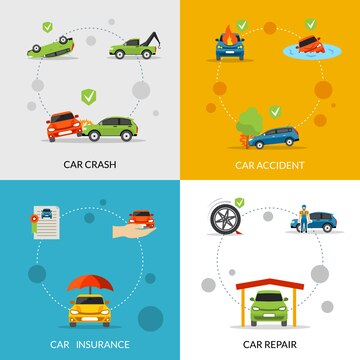

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


### Insurance company want to predict that the current customers/policyholders would also be interested in buying the vehicle insurance or not.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import time

# Used in Hypothesis Testing
from scipy.stats import *
import math

# Used in data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Used in Feature Engineering
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesClassifier

# Used in Data Scaling
from sklearn.preprocessing import StandardScaler

# Used in Oversampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE


# Used in Splitting data
from sklearn.model_selection import train_test_split



# Used in ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
import lightgbm as lgb

# Evaluation Metrics
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Dataset Loading

In [2]:
# Load Dataset
df=pd.read_csv("/kaggle/input/health-insurance-cross-sell-prediction/train.csv",encoding='unicode_escape')

### Dataset First View

In [3]:
# Dataset First Look
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381102,381103,Female,25,1,41,1,< 1 Year,Yes,2630,152,102,0
381103,381104,Male,47,1,50,0,1-2 Year,Yes,39831,26,235,0
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print("the no of rows are",df.shape[0])
print("the no of columns are",df.shape[1])

the no of rows are 381107
the no of columns are 12


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381107 entries, 0 to 381106
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381107 non-null  int64 
 1   Gender                381107 non-null  object
 2   Age                   381107 non-null  int64 
 3   Driving_License       381107 non-null  int64 
 4   Region_Code           381107 non-null  int64 
 5   Previously_Insured    381107 non-null  int64 
 6   Vehicle_Age           381107 non-null  object
 7   Vehicle_Damage        381107 non-null  object
 8   Annual_Premium        381107 non-null  int64 
 9   Policy_Sales_Channel  381107 non-null  int64 
 10  Vintage               381107 non-null  int64 
 11  Response              381107 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
print("there are {} duplicates present.".format(df.duplicated().sum()))

there are 0 duplicates present.


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

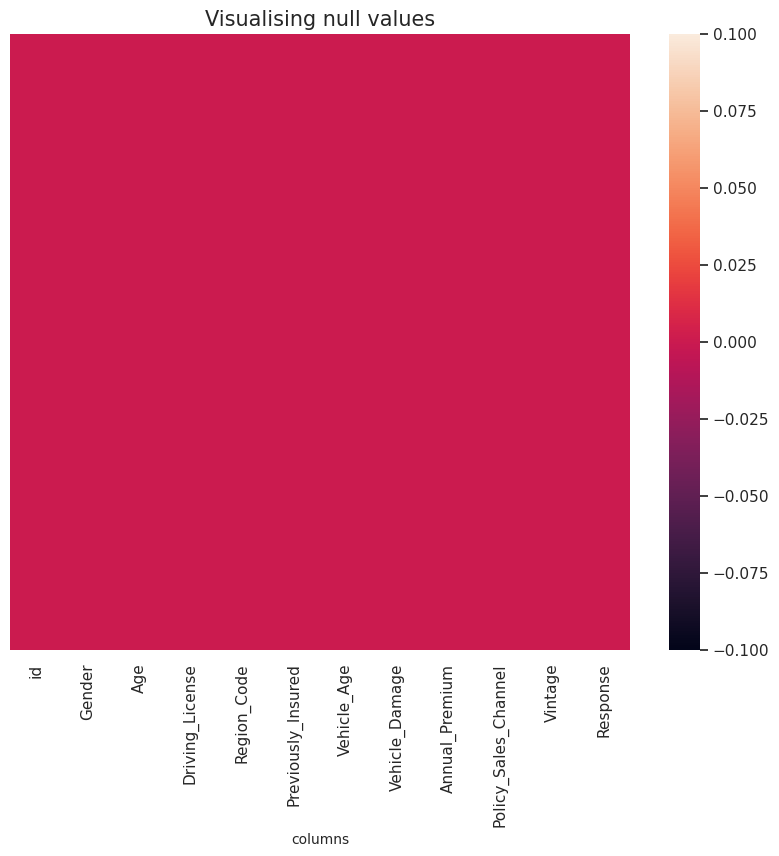

In [8]:
# Visualizing the missing values
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cbar=True,yticklabels=False)
plt.title("Visualising null values",fontsize=15)
plt.xlabel("columns",fontsize=10)
plt.show()

### What did you know about your dataset?

So far we have understand that there are approx 3,81,107 rows having no duplicate values and no null values .

Sell prediction is analytical studies on the possibility of a customer abandoning service. The goal is to understand and take steps to change it before the costumer gives up the service.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [10]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381107.0,190554.000000,110016.258857,1.0,95277.5,190554.0,285830.5,381107.0
Age,381107.0,38.822488,15.511575,20.0,25.0,36.0,49.0,85.0
Driving_License,381107.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381107.0,26.388833,13.229907,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381107.0,0.458213,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381107.0,30564.323287,17213.175589,2630.0,24405.0,31668.0,39400.0,540165.0
Policy_Sales_Channel,381107.0,112.034489,54.203954,1.0,29.0,133.0,152.0,163.0
Vintage,381107.0,154.347391,83.671315,10.0,82.0,154.0,227.0,299.0
Response,381107.0,0.122564,0.327937,0.0,0.0,0.0,0.0,1.0


### Variables Description 

**id : Unique ID for the customer**

**Gender : Gender of the customer**

**Age: age of the customers**

**Driving_License - 0 : Customer does not have DL
                    1 : Customer already has DL**

**Region_Code : Unique code for the region of the customer**

**Previously_Insured - 1 : Customer already has Vehicle Insurance, 
                       0 : Customer doesn't have Vehicle Insurance**

**Vehicle_Age : Age of the Vehicle**

**Vehicle_Damage - 1: Customer got his/her vehicle damaged in the past
                   0: Customer didn't get his/her vehicle damaged in the past.**

**Annual_Premium: The amount customer needs to pay as premium in the year**

**PolicySalesChannel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.**

**Vintage : Number of Days, Customer has been associated with the company**

**Response - 1 : Customer is interested
             0 : Customer is not interested**


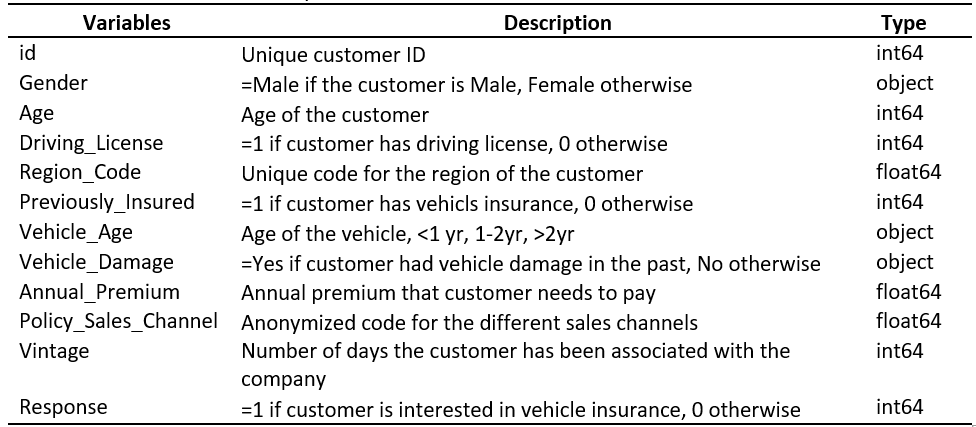

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
df.nunique().sort_values(ascending=True)

Gender                       2
Driving_License              2
Previously_Insured           2
Vehicle_Damage               2
Response                     2
Vehicle_Age                  3
Region_Code                 53
Age                         66
Policy_Sales_Channel       155
Vintage                    290
Annual_Premium           48838
id                      381107
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

# Assingning numericals column of df to variable numerical_cols
numerical_cols = list(df.describe())
numerical_df = df[numerical_cols]
numerical_df.head()



,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28,0,40454,26,217,1
1,2,76,1,3,0,33536,26,183,0
2,3,47,1,28,0,38294,26,27,1
3,4,21,1,11,1,28619,152,203,0
4,5,29,1,41,1,27496,152,39,0


In [13]:

# Assigning catagoricals column of df to variable catagorical_cols
categorical_cols=list(set(df.columns)-set(numerical_cols))
categorical_df=df[categorical_cols]
categorical_df.head()

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No


In [14]:
categorical_df.nunique()

Gender            2
Vehicle_Age       3
Vehicle_Damage    2
dtype: int64

### What all manipulations have you done and insights you found?

**In this dataset, nothing to do in wrangling .so i just divided the df in two dfs i.e, numerical_df and categorical_df.**


**Numerical_df for all the numericals column and categorical_df is for all the categorical columns and I check the categorical_df then I found there are 3 columns i.e gender, vehicle_age and vehicle_damage and there are 2 unique in gender, 3 unique in vehicle_age and 2 unique in vehicle_damage.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 We have dependent variable as response column, we will visualise the column.

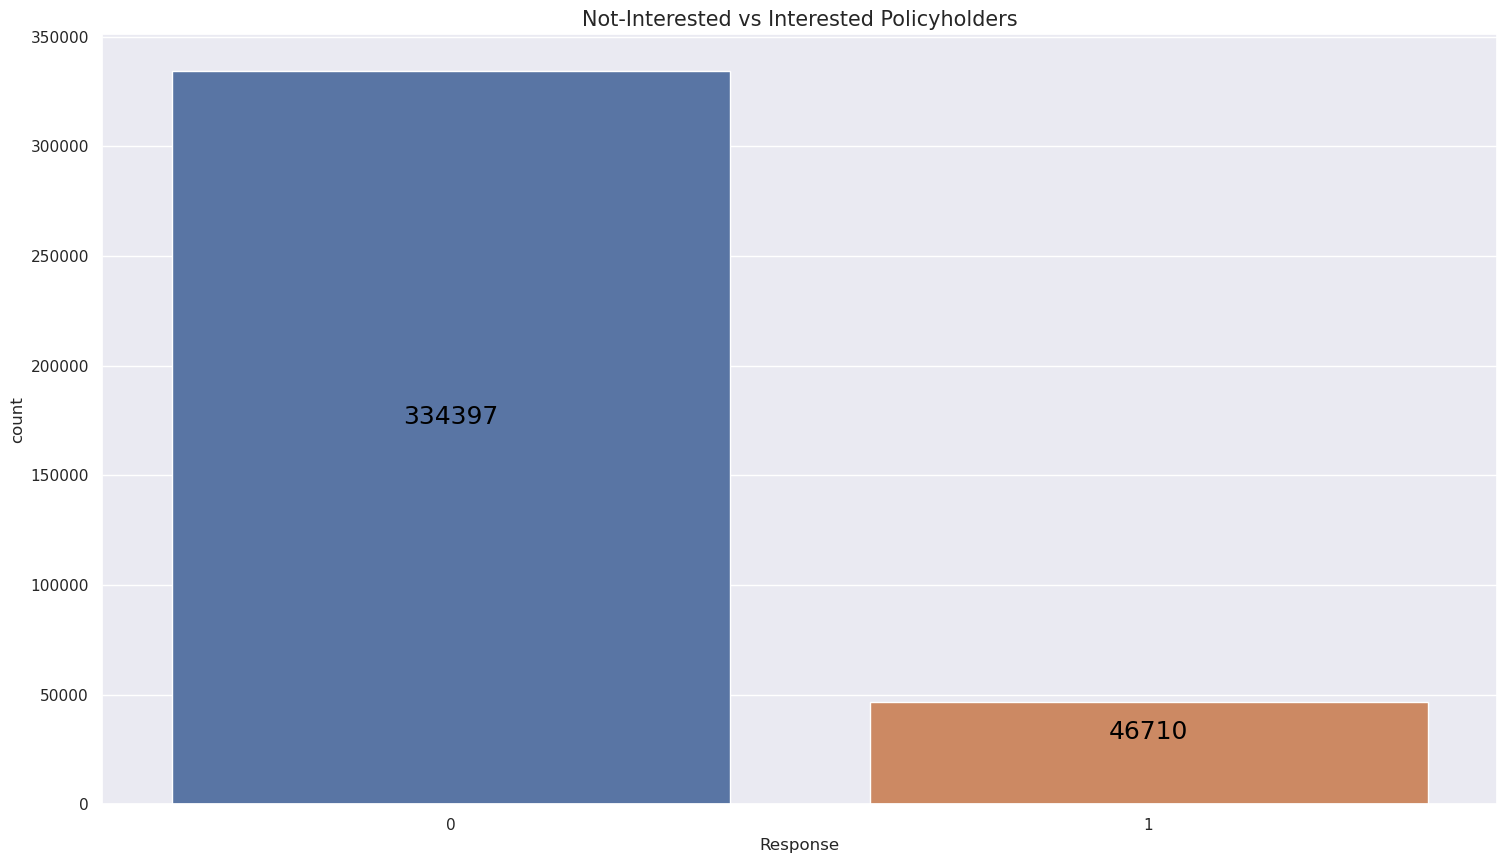

<Figure size 640x480 with 0 Axes>

In [15]:
# Chart - 1 visualization code 
# Dependent Variable Column Visualization
plt.figure(figsize=(18, 10))
pps = sns.countplot(data=df, x='Response')
pps.bar_label(pps.containers[0], label_type='center', padding=15, color='Black', fontsize=18)
plt.title('Not-Interested vs Interested Policyholders', fontsize=15)

plt.show()
plt.tight_layout()



##### 1. Why did you pick the specific chart?

Answer Here. **To show the count of interested and not-interested of policyholders , So i have used Countplot.**

##### 2. What is/are the insight(s) found from the chart?

Answer Here


**1)The dependant variable has binary values of 0 and 1. We can infer from the plot above that many clients have no interest in purchasing vehicle insurance.**


**2)12.25 percent of the data are 1's and 87.74 percent of the data are 0's. This data must be handled using the imbalance technique since the output feature is imbalanced.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

**1)No, the gained insights help a positive business impact.**

**2)No, there are no such insights that lead to negative growth.**

#### Chart - 2

Male      206088
Female    175019
Name: Gender, dtype: int64




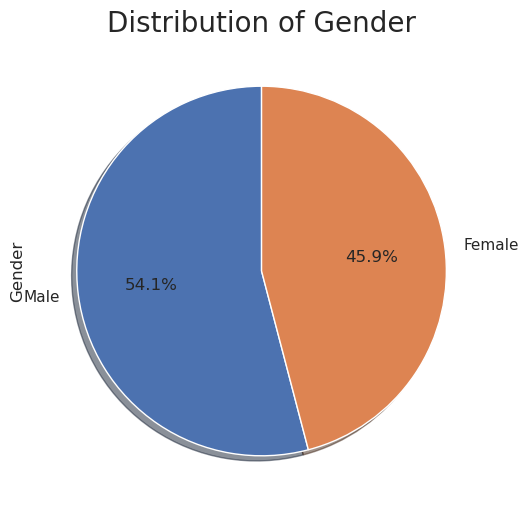

In [16]:
# Chart - 2 visualization code
print(df.Gender.value_counts())
print("\n")
# Independent Variable Column Visualization
df['Gender'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               explode=[0,0]
                              )
plt.title('Distribution of Gender',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here. 
**Gender difference is best represented by pie chart.**

##### 2. What is/are the insight(s) found from the chart?

Answer Here-
**From the above pie chart i found there are 206088 male i.e (54.1 %) and 175019 female i.e (45.9 %). So , we can say that gender variable is almost equally distributed but male are liitle bit more in comparison to female.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.
**No, the gained insights help a positive business impact.**


**No, there are no such insights that lead to negative growth**

#### Chart - 3

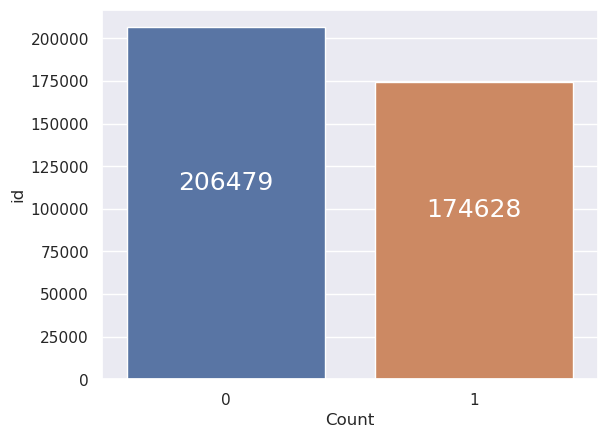

In [17]:
# Chart - 3 visualization code
# Independent Variable Column Visualization
df1=df.pivot_table(columns=['Previously_Insured'],aggfunc="count").T.reset_index()
c=sns.barplot(data=df1,x='Previously_Insured',y="id")
c.bar_label(c.containers[0], label_type='center', padding=15,color='white',fontsize=18)
plt.xlabel("Count")
plt.show()
     

##### 1. Why did you pick the specific chart?

Answer Here.
**Countplot show the frequency, count of values for the different levels of a categorical variable.**

##### 2. What is/are the insight(s) found from the chart?

Answer Here-  **From the above countplot, i found that there ar 206479 those people who not insured previously and 174628 are those people who insured previously, which is almost equally distributed but Previously Insured people are little bit more in comparison to not insured people.**



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here-


**No, the gained insights didn't create a positive business impact.**


**No, there are no such insights that lead to negative growth.**


#### Chart - 4

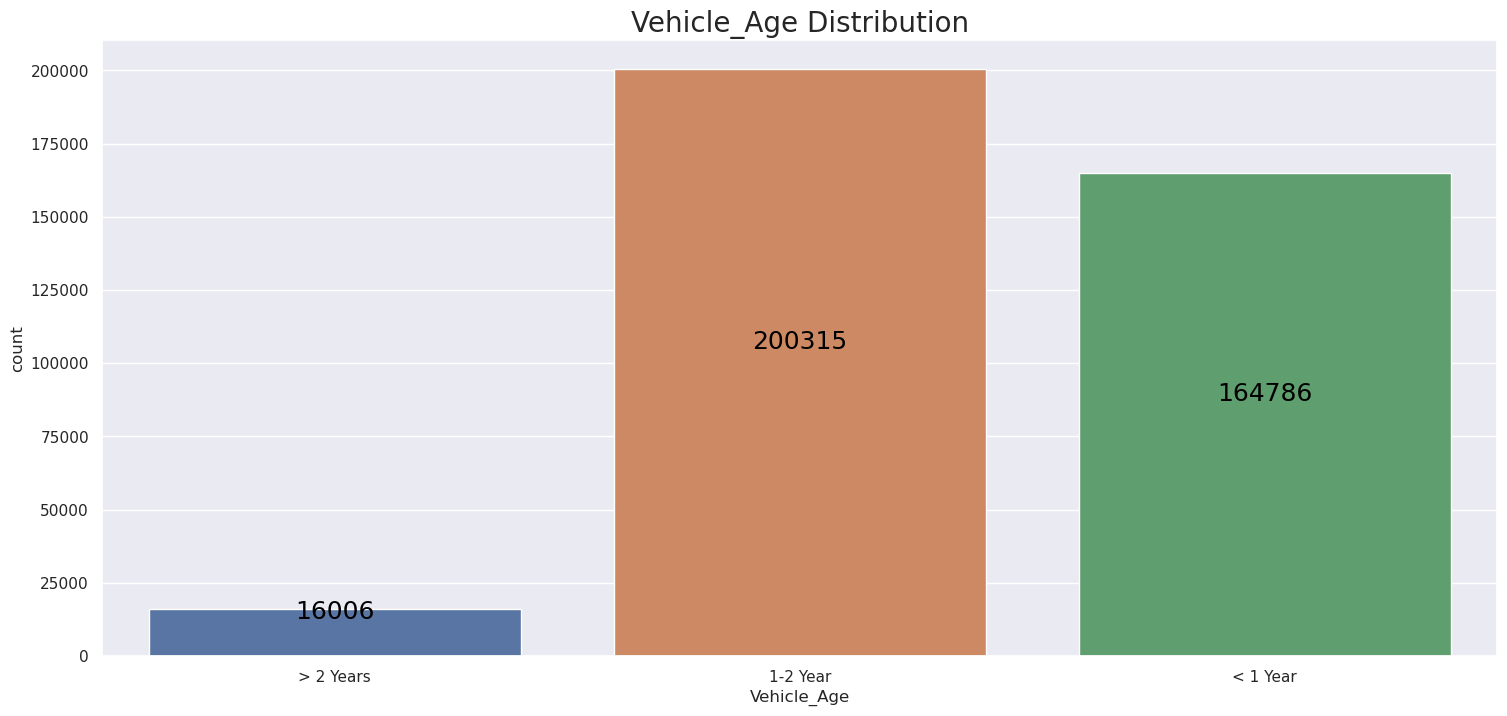

In [18]:
plt.figure(figsize=(18,8))


# Independent Variable Column Visualization
d=sns.countplot(data=df, x='Vehicle_Age')
d.bar_label(d.containers[0], label_type='center', padding=15,color='Black',fontsize=18)
plt.title('Vehicle_Age Distribution',fontsize=20)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.-

**Countplot show the frequency, count of values for the different levels of a categorical variable.**

**To show the Vehicle age distribution. I have used countplot.**



##### 2. What is/are the insight(s) found from the chart?

Answer Here-


**From the above countplot, we can say that most of the people having those vehicle whose age in range 1-2 years in comparison others two.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here-


**No, the gained insights didn't create a positive business impact.**
**No, there are no such insights that lead to negative growth.**

#### Chart - 5

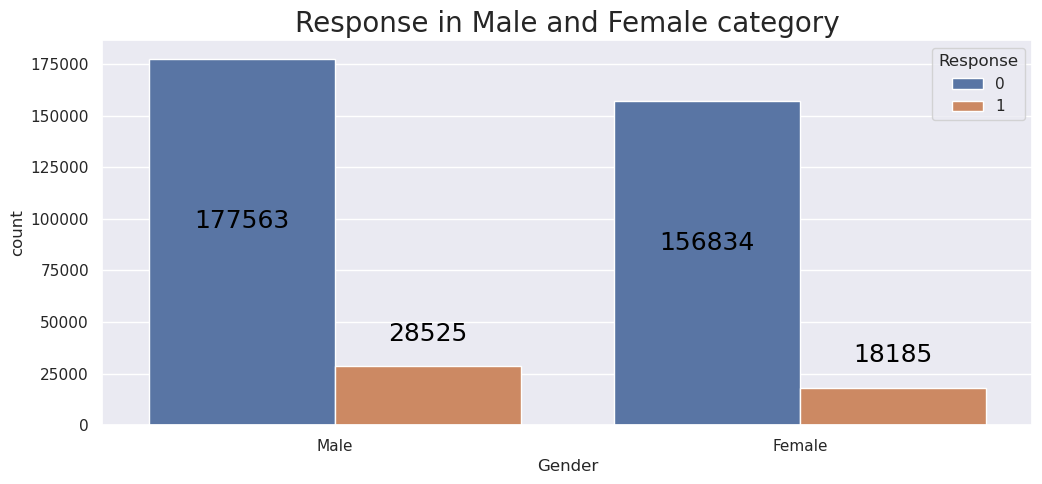

In [19]:
# Chart - 5 visualization code
plt.figure(figsize = (12,5))
e=sns.countplot(data=df, x= 'Gender', hue= df['Response'])
e.bar_label(e.containers[0], label_type='center', padding=15,color='Black',fontsize=18)
e.bar_label(e.containers[1], label_type='edge', padding=15,color='Black',fontsize=18)
plt.title('Response in Male and Female category', fontsize=20)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

**Mainly used the stacked column to visualise the number of responses based in gender**

##### 2. What is/are the insight(s) found from the chart?

**Most of the responses says that 177563 males and 156834 females have responded 'No'.**


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here -**No insights have gain and will not create a positive business impact.**

#### Chart - 6

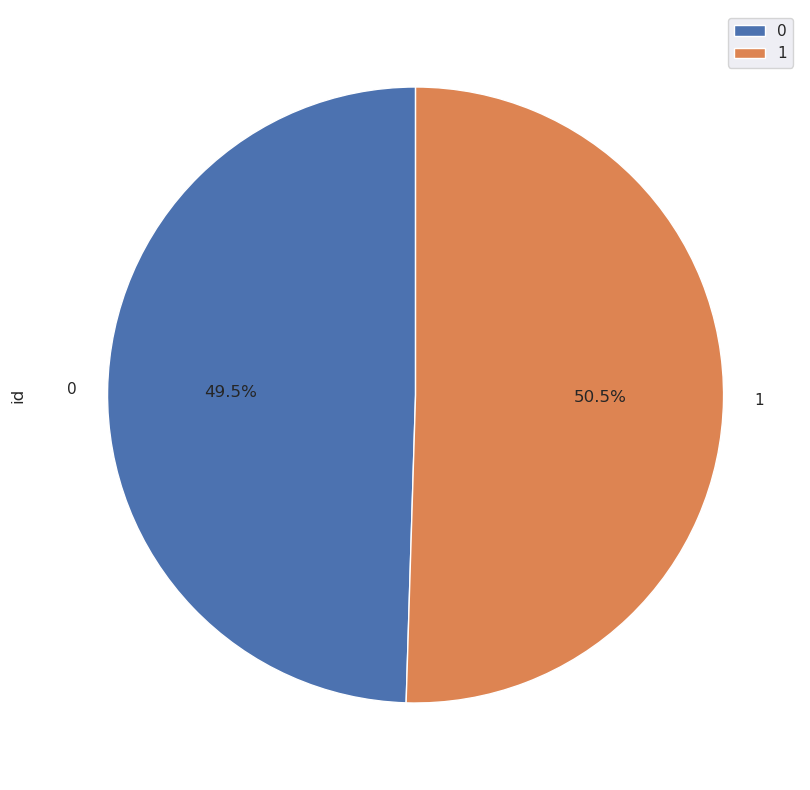

In [20]:
# Chart - 6 visualization code
c=df.pivot_table(columns=["Vehicle_Damage"],aggfunc="count").T.reset_index()
c.plot(kind='pie',x="Vehicle_Damage",y="id",
        figsize=(15,10),
        autopct="%1.1f%%",
        startangle=90,
        explode=[0,0]
        )

plt.show()

##### 1. Why did you pick the specific chart?

**Pie plot is best for representing values that are between two components.**

##### 2. What is/are the insight(s) found from the chart?

 **We can see that 49.5 % who are responsing "no"have their car damaged. Whereas, people who responses "yes" have damaged of about 50.5%.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**We can look into the matter that whose vehicle is damaged , they have only brought the insurance.**

#### Chart - 7

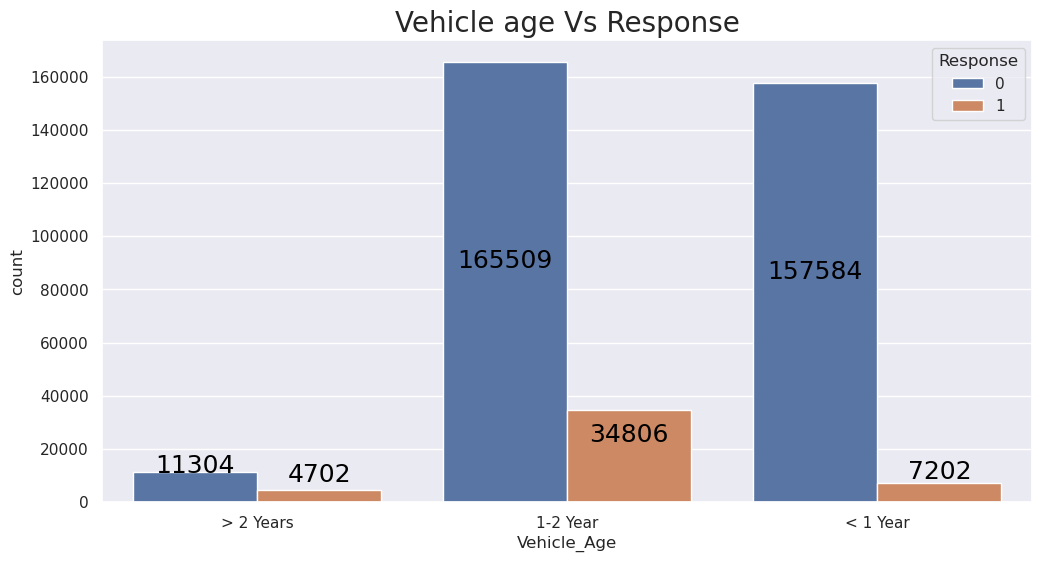

In [21]:
# Chart - 7 visualization code

plt.figure(figsize=(12,6))
d=sns.countplot(x='Vehicle_Age',hue='Response',data=df)
d.bar_label(d.containers[0], label_type='center', padding=15,color='Black',fontsize=18)
d.bar_label(d.containers[1], label_type='center', padding=15,color='Black',fontsize=18)
plt.title('Vehicle age Vs Response',fontsize=20)
plt.show()
     

##### 1. Why did you pick the specific chart?

Answer Here.

**To show the Previously Insured Vs Response. I have used countplot.**

##### 2. What is/are the insight(s) found from the chart?

Answer Here

**we can say that customers whose vehicle age is between 1-2 years are most likely to be interested when compared to the other two.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here-

**Yes, the gained insights help to create a positive impact on business because on the basis of above analysis, we have a lower number of policyholders with vehicles older than two years, so we must focus more on the other two categories.**


#### Chart - 8

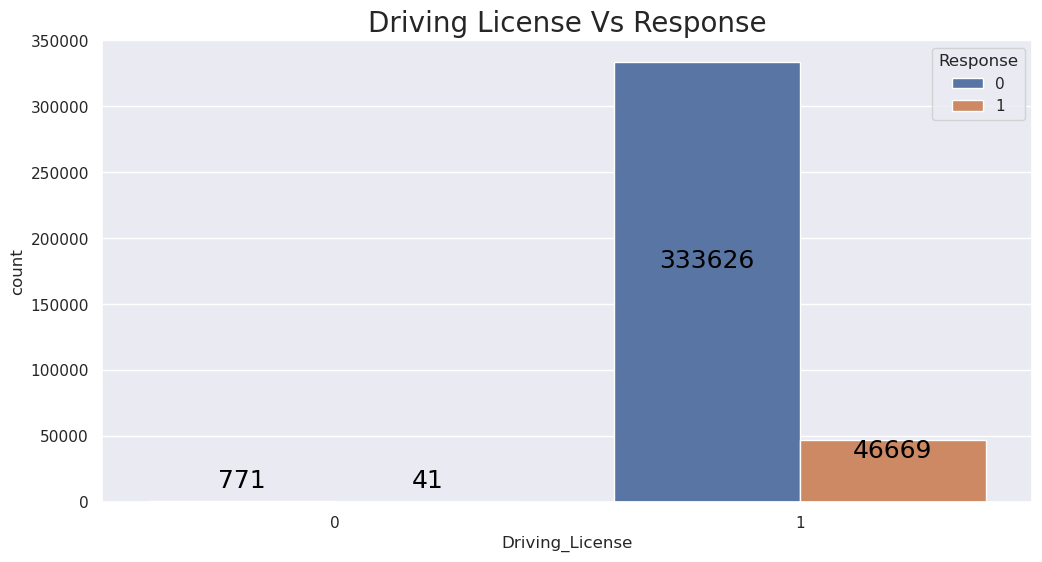

In [22]:
# Chart - 8 visualization code
plt.figure(figsize=(12,6))
d=sns.countplot(x='Driving_License',hue='Response',data=df)
d.bar_label(d.containers[0], label_type='center', padding=15,color='Black',fontsize=18)
d.bar_label(d.containers[1], label_type='center', padding=15,color='Black',fontsize=18)
plt.title('Vehicle age Vs Response',fontsize=20)
plt.title('Driving License Vs Response',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here-
**To show response's univariate analysis**

##### 2. What is/are the insight(s) found from the chart?

Answer Here-**From the above countplot, we can say that, Customers who are interested in Vehicle insurance are almost having the driving license.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here-
**Yes, the gained insights help to create a positive impact on business because on the basis of above analysis we can target those peoples who are having driving license.**

#### Chart - 9

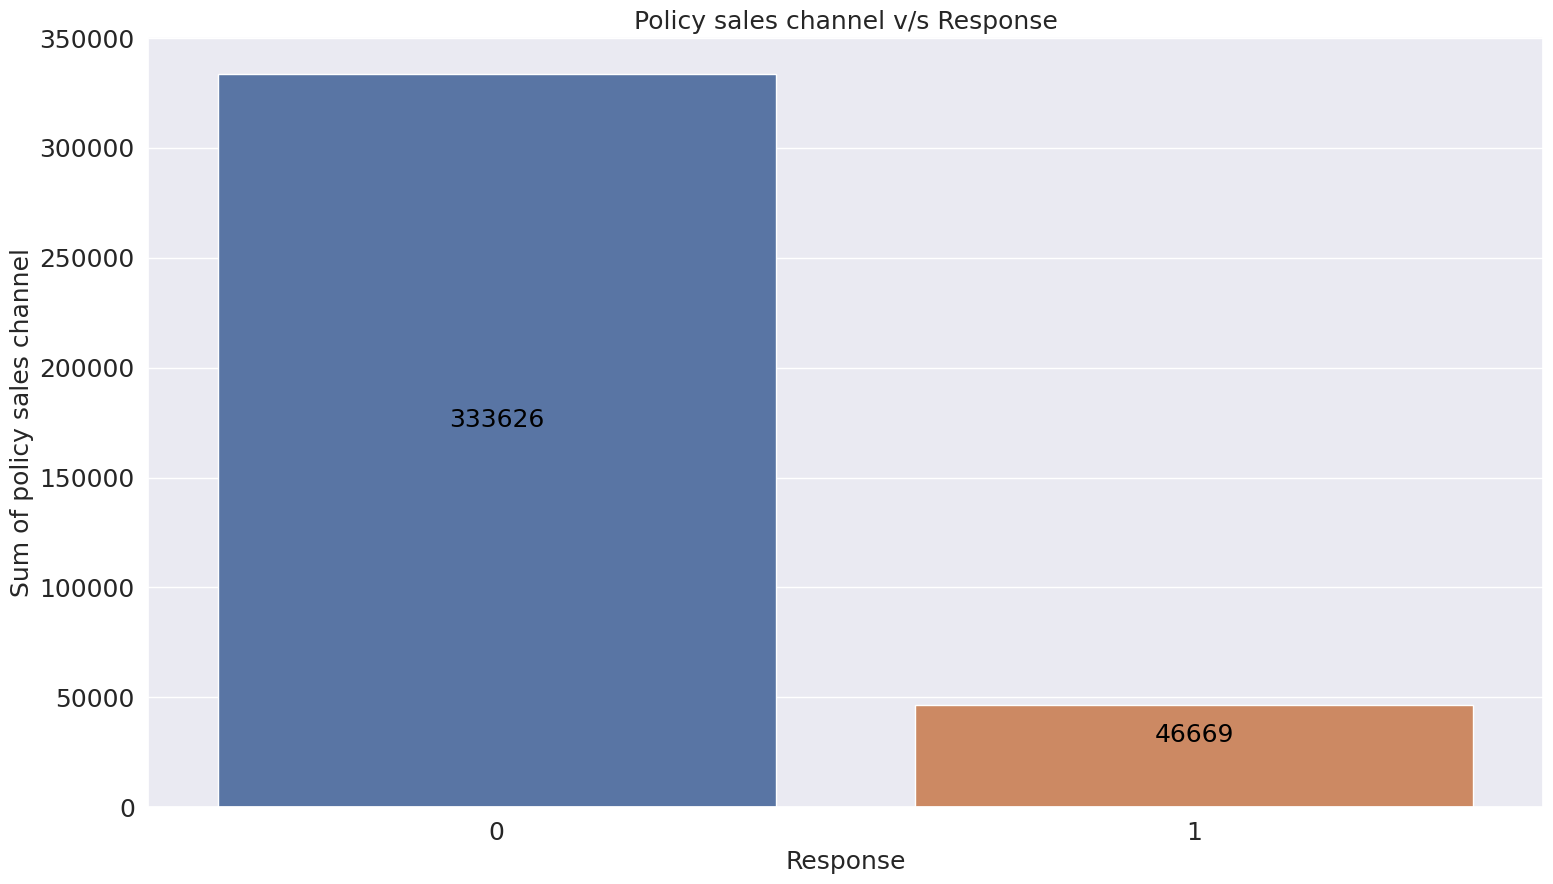

In [23]:
plt.figure(figsize=(18,10))
d=df.pivot_table(columns=['Response'],aggfunc='sum').reset_index().T.reset_index().drop(0,axis=0)
e=sns.barplot(data=d,x="Response",y=2)
e.bar_label(e.containers[0], label_type='center', padding=15,color='Black',fontsize=18)
plt.title("Policy sales channel v/s Response",fontsize=18)
plt.xlabel("Response",fontsize=18)
plt.ylabel("Sum of policy sales channel",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18) 
plt.show()

##### 1. Why did you pick the specific chart?
**Box plot is usually used to see the outliers and the different values that are behaving differently.**

##### 2. What is/are the insight(s) found from the chart?

Answer Here- **It will help us to know how many sales channel do all of the people combined have responded . Only 46669 sales channel have been hold by people who have responded 'yes' and 333626 sales channel are with those who have responded 'no'.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here-**Not such help for creating a positive business impact.**

#### Chart - 10

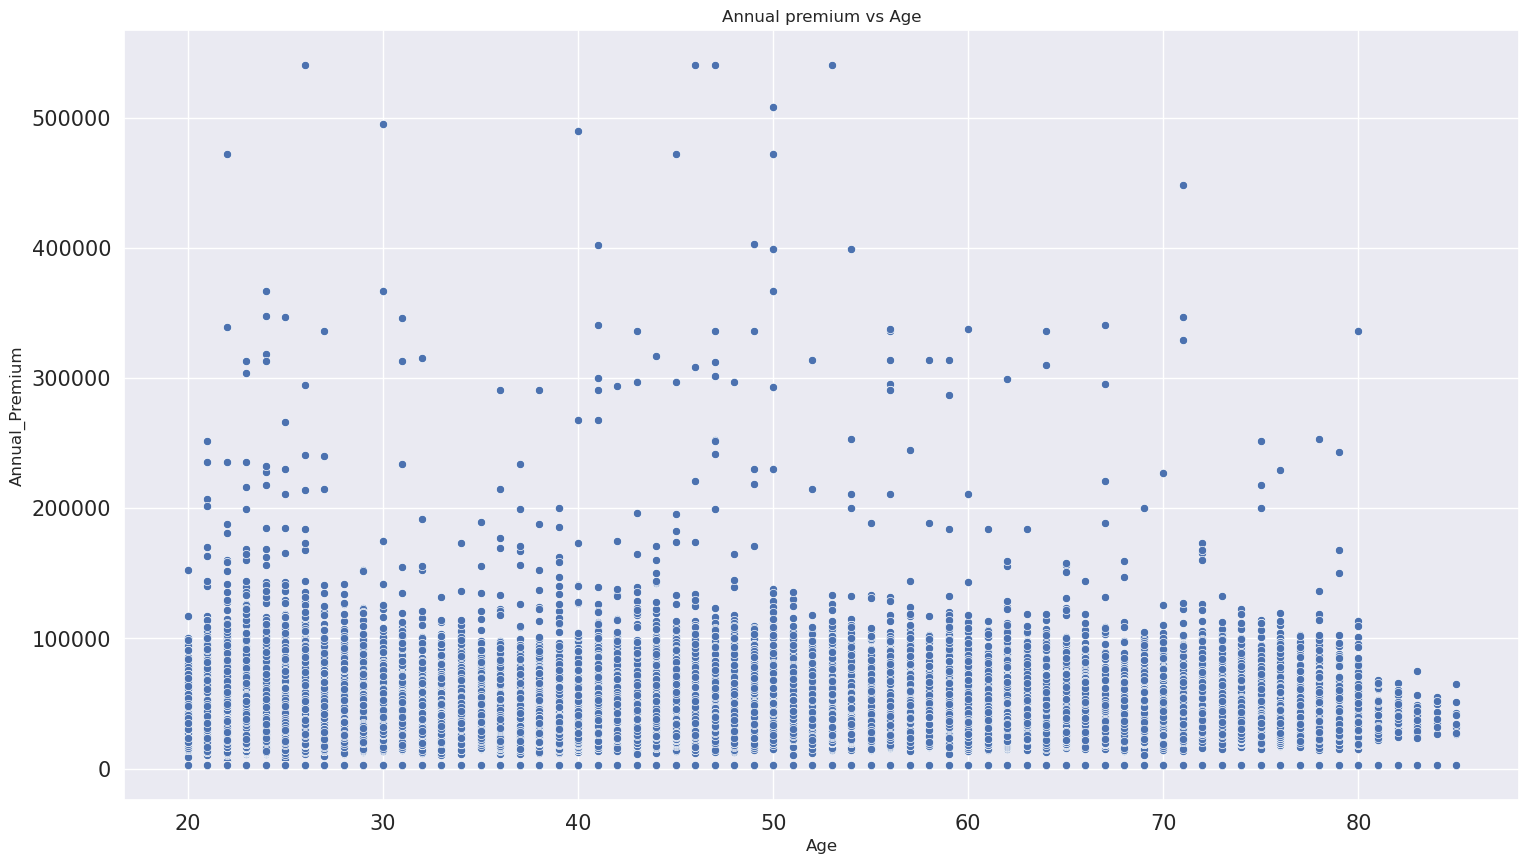

In [24]:
# Chart - 10 visualization code
df.astype({"Age":"object"})
plt.figure(figsize=(18,10))
sns.scatterplot(data=df,x="Age",y="Annual_Premium")
plt.title("Annual premium vs Age")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here- **Scatter plot helps in viewing the discrete information between two attributes.**

##### 2. What is/are the insight(s) found from the chart?

Answer Here-
**Most of the age of our customers are arbitary distributed, and also the premium amount
is not constrained to any amount.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here-
**We can gain that age is not a factor to hold an annual premium.**

#### Chart - 11

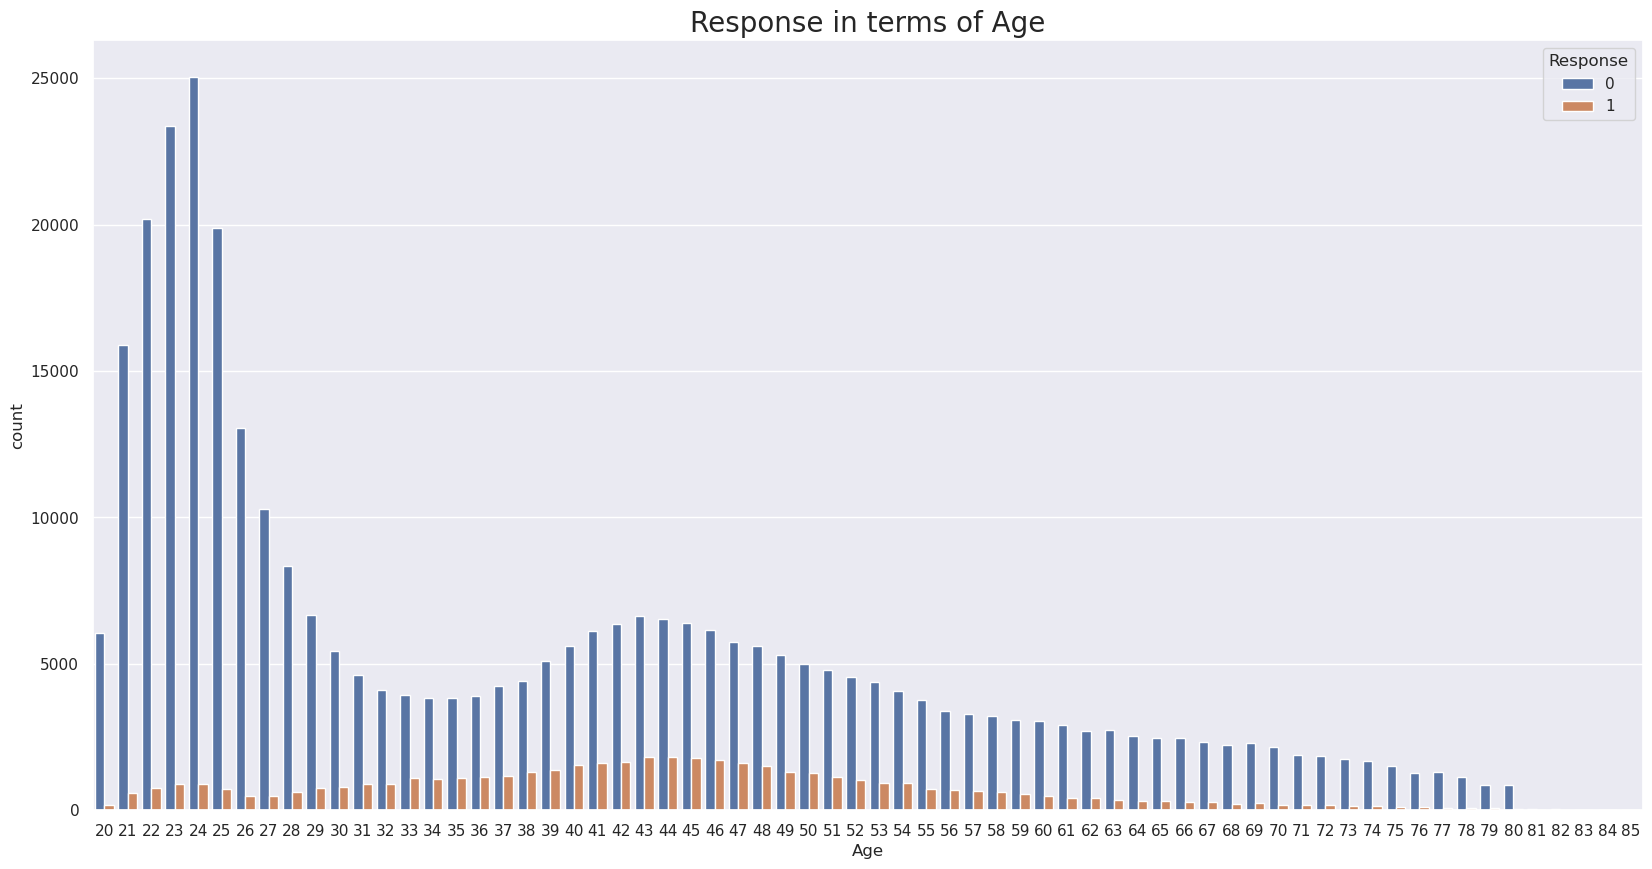

In [25]:
# Chart - 11 visualization code


# Chart - 13 visualization code
plt.figure(figsize = (20,10))
sns.countplot(x='Age', data=df,hue="Response")
plt.title('Response in terms of Age', fontsize=20)
plt.show()
     

##### 1. Why did you pick the specific chart?

Answer Here.= **Countplot is best for showing different interval values count.**

##### 2. What is/are the insight(s) found from the chart?

Answer Here-
**We can see that Ages below 30 are not more interested in purchasing vehicle**


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here-- **People can be targeted on the basis of their age , at which age they can be grouped.**

#### Chart - 12

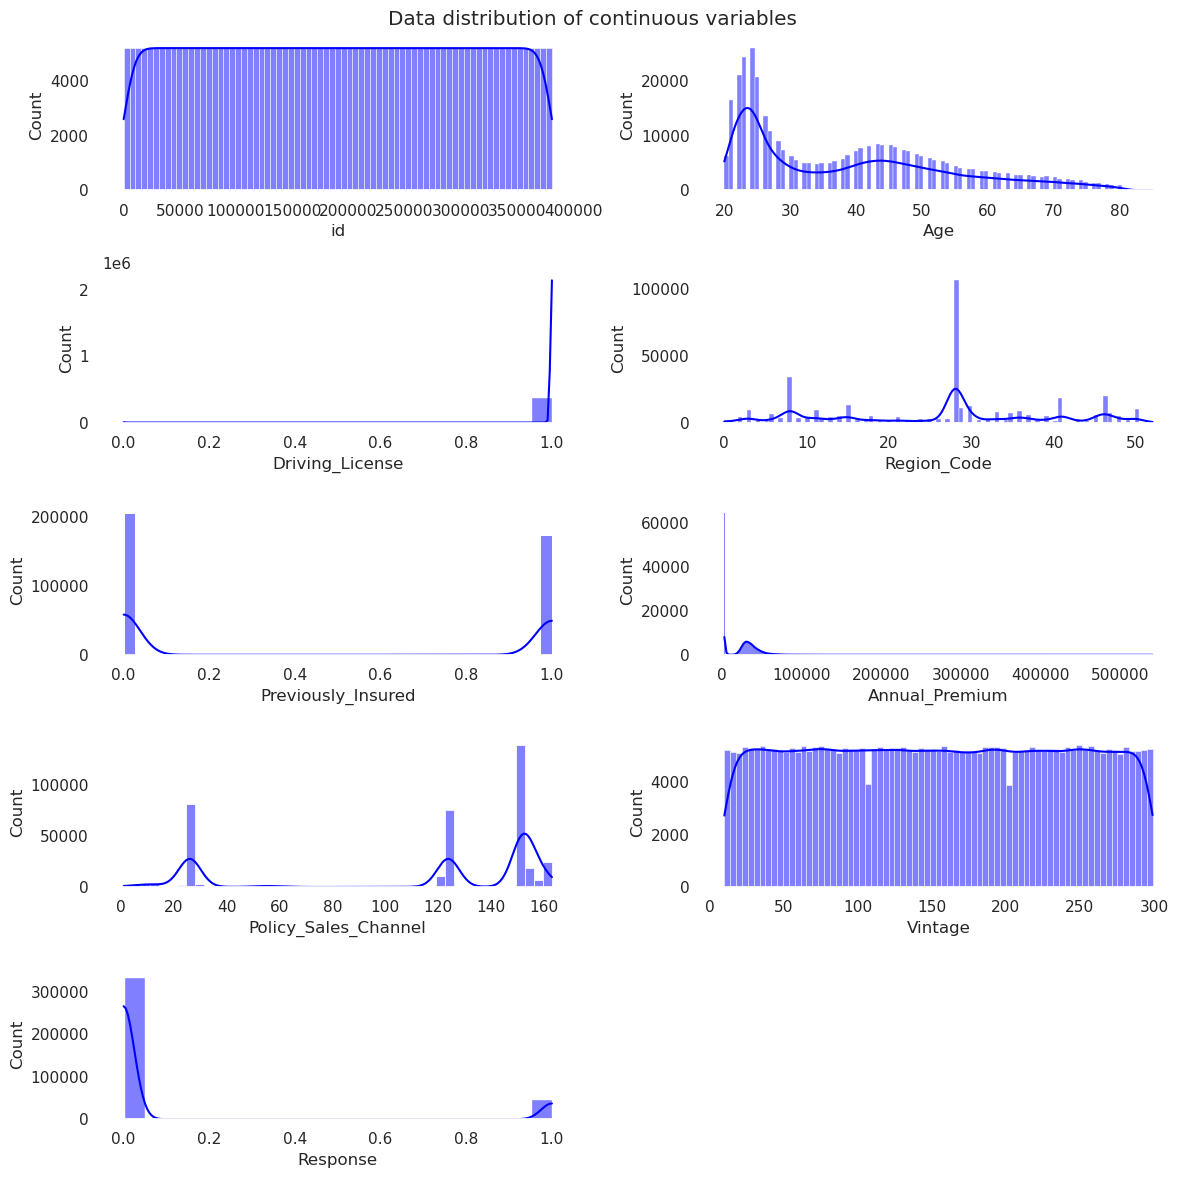

In [26]:
# Chart - 12 visualization code
plt.figure(figsize=(12, 12))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='blue',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.--**Combining all the distribution plot to visualise easily**


##### 2. What is/are the insight(s) found from the chart?

Answer Here-**Comparison can be drawn between numerical variables such as age,annual premium, region code, response and vintage.it help us in knowing the skewness and kurtosis of our distributions.** 

In [27]:
df.skew()

id                     -5.488513e-16
Age                     6.725479e-01
Driving_License        -2.159512e+01
Region_Code            -1.152702e-01
Previously_Insured      1.677374e-01
Annual_Premium          1.766100e+00
Policy_Sales_Channel   -9.000152e-01
Vintage                 3.029543e-03
Response                2.301897e+00
dtype: float64

**Driving license, policy sales channel are highly left skewed,whereas age,vintage are right skewed.**

In [28]:
df.kurtosis()

id                       -1.200000
Age                      -0.565636
Driving_License         464.351839
Region_Code              -0.867859
Previously_Insured       -1.971875
Annual_Premium           34.004612
Policy_Sales_Channel     -0.970797
Vintage                  -1.200684
Response                  3.298746
dtype: float64

**driving license has high kurtosis as well as the annual premium.**

#### Chart - 13

Text(0, 0.5, 'Number of Customers')

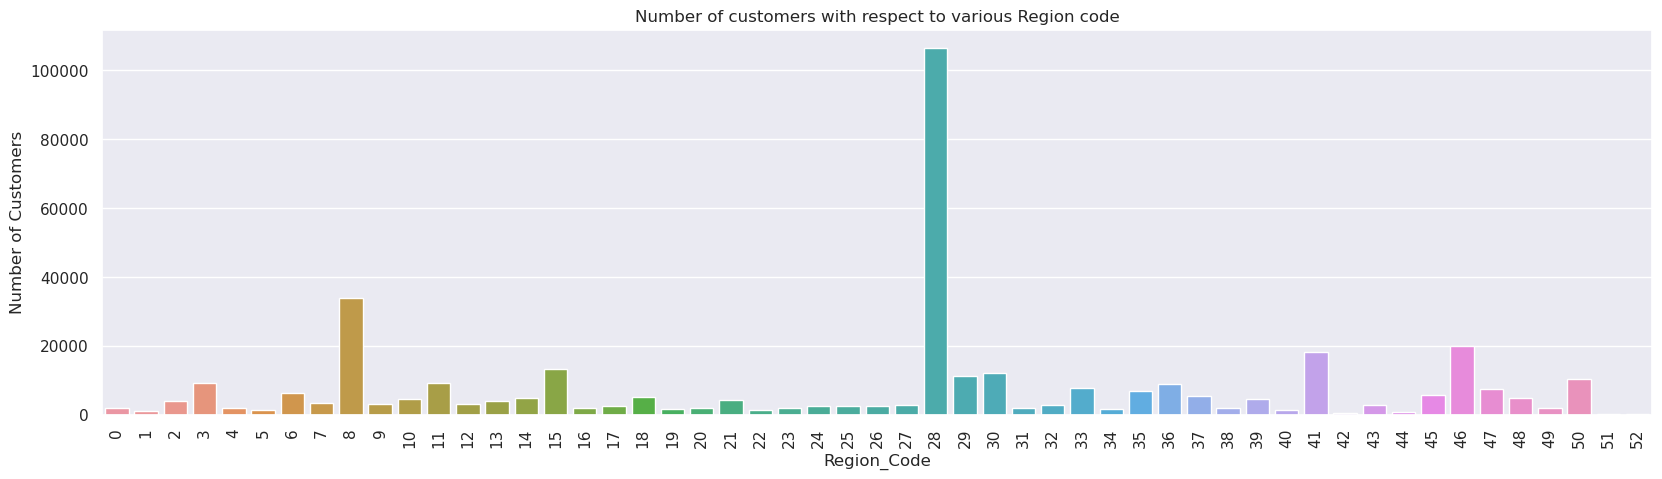

In [29]:

# Chart - 10 visualization code
sns.set_style('darkgrid')
plt.figure(figsize=(20, 5))

sns.countplot(x='Region_Code', data=df)

plt.title('Number of customers with respect to various Region code')
plt.xticks(rotation=90)
plt.ylabel('Number of Customers')

##### 1. Why did you pick the specific chart?

Answer Here.-
**Bar plot is used to display the values on two attributes i.e, clearly able to visualise them**.

##### 2. What is/are the insight(s) found from the chart?

Answer Here-**We can see most of the people are from region 28 where the responses are in clear majority of "No",other people are from region 8.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here--
**We can get to know where most of the people are from which region.**

#### Chart - 14 - Correlation Heatmap

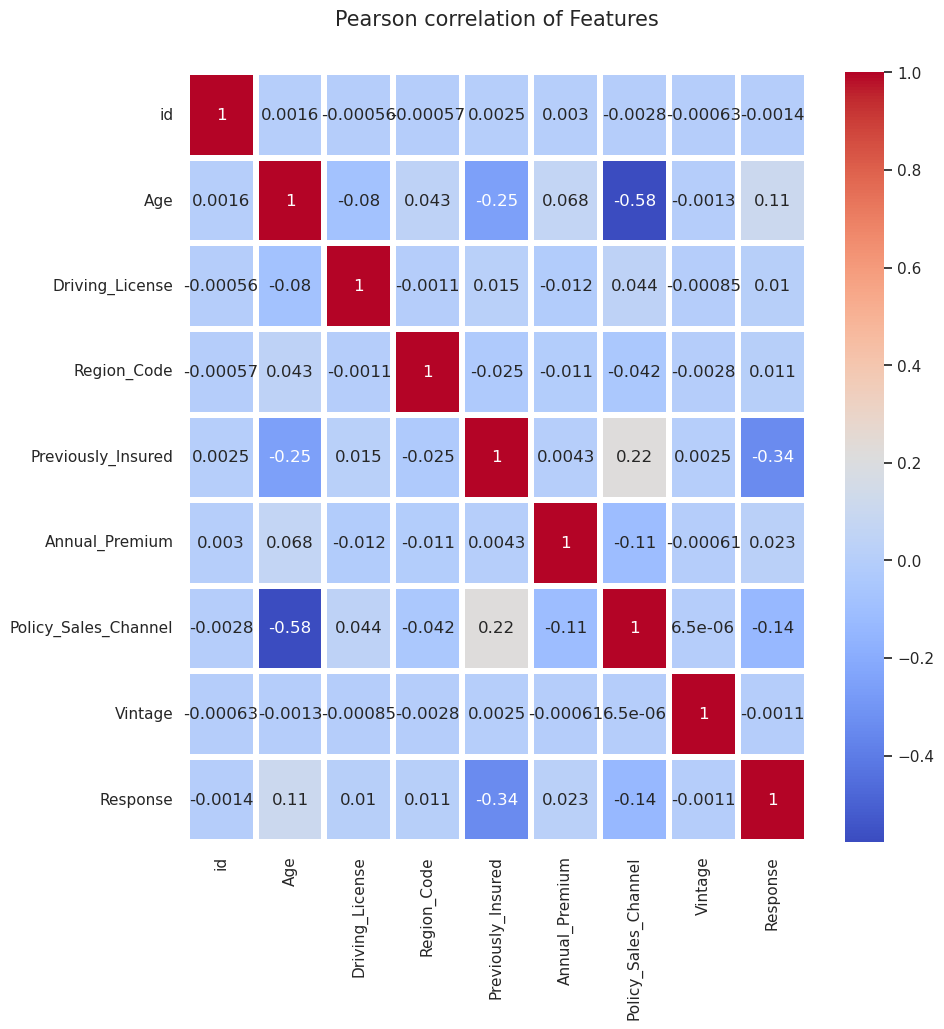

In [30]:
# Correlation Heatmap visualization code
corr = df.corr()

f, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='coolwarm')

plt.title("Pearson correlation of Features", y=1.05, size=15)
plt.show()     

##### 1. Why did you pick the specific chart?

Answer Here.

**A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables.**

**As correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].**

**Thus to know the correlation between all the variables along with the correlation coeficients, are used in correlation heatmap.**

##### 2. What is/are the insight(s) found from the chart?

Answer Here-

**Response  is not much affected by Vintage variable. we can drop least correlated variable.**

**Policy_sales_channel and age is negatively correlated.**

**Response is inversely correlated by people who are previously insured.**

#### Chart - 15 - Pair Plot 

In [31]:

# Pair Plot visualization code


#sns.pairplot(data= df,diag_kind='kde', kind = 'reg')

#plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.



**Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.**

**It also helps to form some simple classification models by drawing some simple lines or make linear separation in our dataset.**

**Thus, I used pair plot to analyse the patterns of data and realtionship between the features. It's exactly same as the correlation map but here you will get the graphical representation.**


##### 2. What is/are the insight(s) found from the chart?

Answer Here


-







**The graph above shows how each feature is distributed in respect to other features. Since many features have binary values, we cannot see a good relationship with other features.**

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here-

**Average age is  greater than 40 years.**

**N <= 40     (NULL HYPOTHESIS)**


**N > 40    (ALTERNATE HYPOTHESIS)**

#### 2. Perform an appropriate statistical test.

In [32]:

# Perform Statistical Test to obtain P-Value

age_sample = df['Age'].sample(500)
age_mean = np.mean(age_sample)
age_std = np.std(age_sample)

In [33]:

# Computing test statistic

ts = (age_mean-40)/(age_std/(np.sqrt(500)))
print(ts)
     

-1.3433567613400763


In [34]:

# Calculating the probability

prob_z = norm.cdf(ts, 0, 1)
print(prob_z)

# P-Value
p1 = 1-prob_z
print(p1)

0.08957824032522066
0.9104217596747793


##### Which statistical test have you done to obtain P-Value?

Answer Here -**We have chosen Z-test to obtain p-value.**



##### Why did you choose the specific statistical test?

Answer Here.-
**As we are performing hypothesis testing for mean, we have chosen Z-test to obtain p-value. The probability we have obtained is  less than 100%, so we have sufficient evidence to reject H0. Therefore, the average age f the customer is less than 40.**

## ***6. Feature Engineering & Data Pre-processing***

In [35]:


# Creating a copy of the dataset for further feature engineering
df_1 = df.copy()
     

### 1. Handling Missing Values

In [36]:
# Handling Missing Values & Missing Value Imputation


print(df_1.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.-**There are no missing values present**.

### 2. Handling Outliers

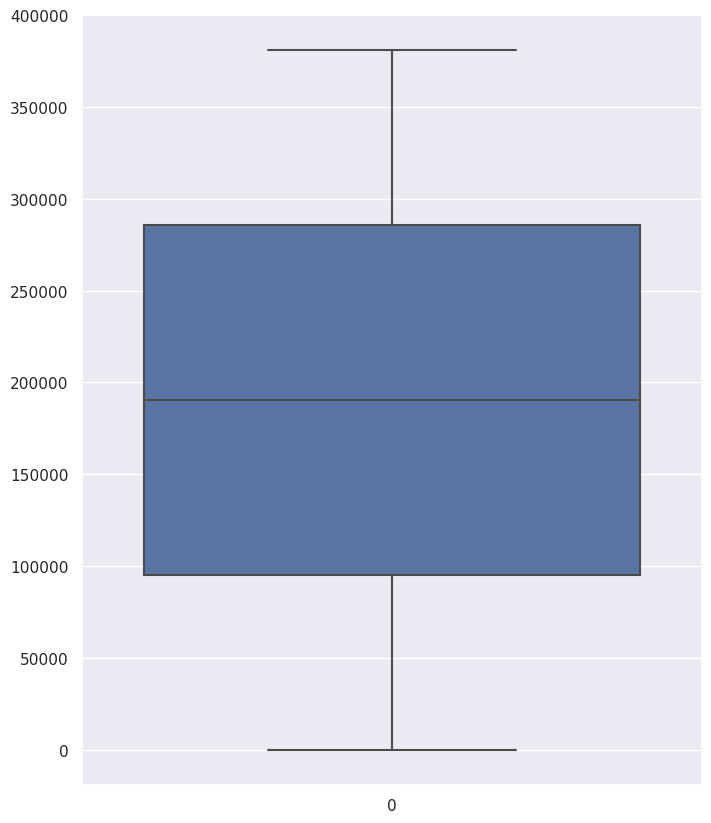

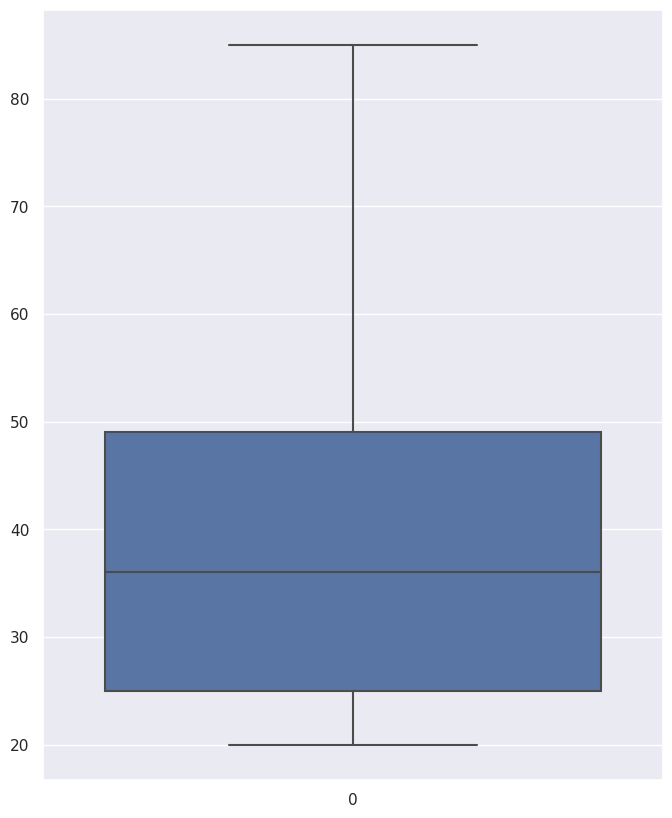

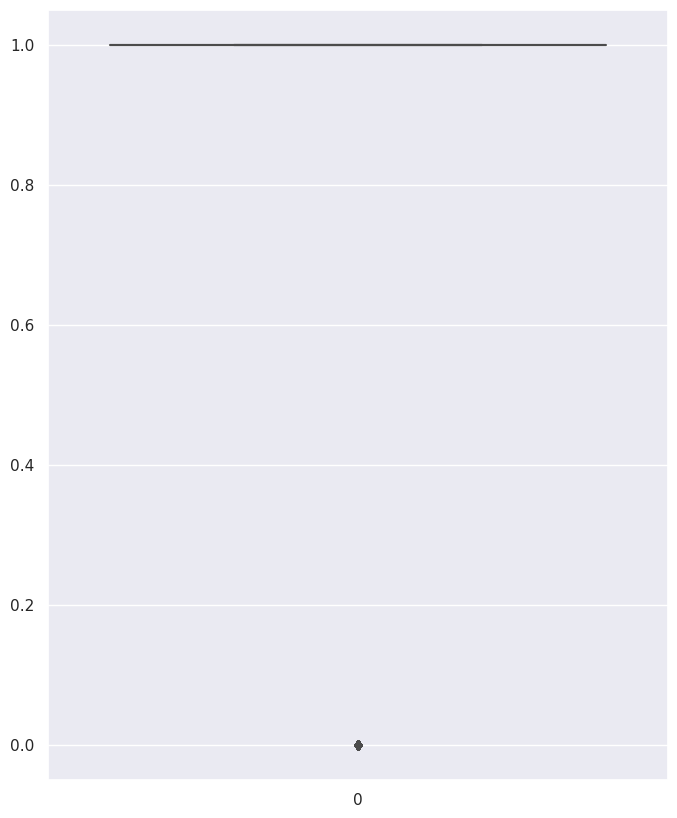

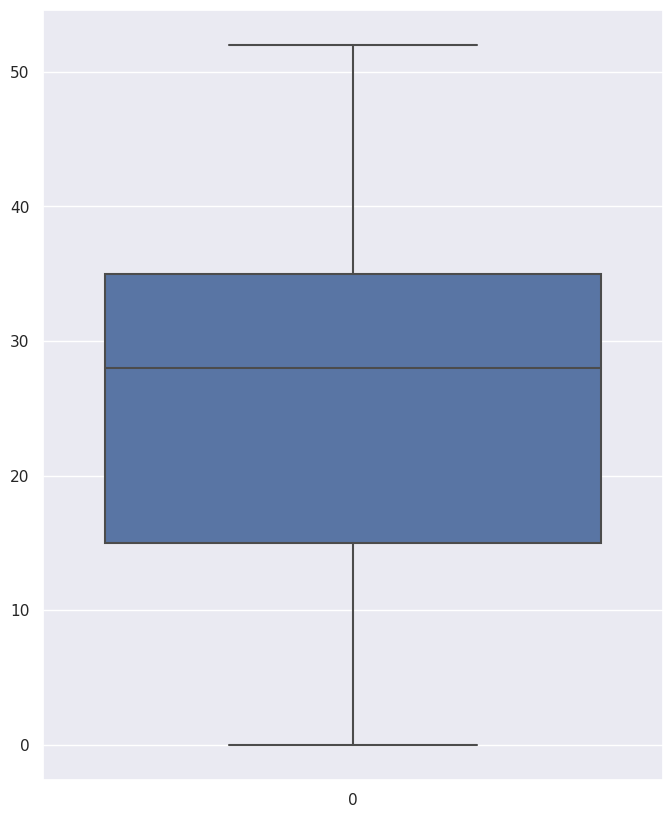

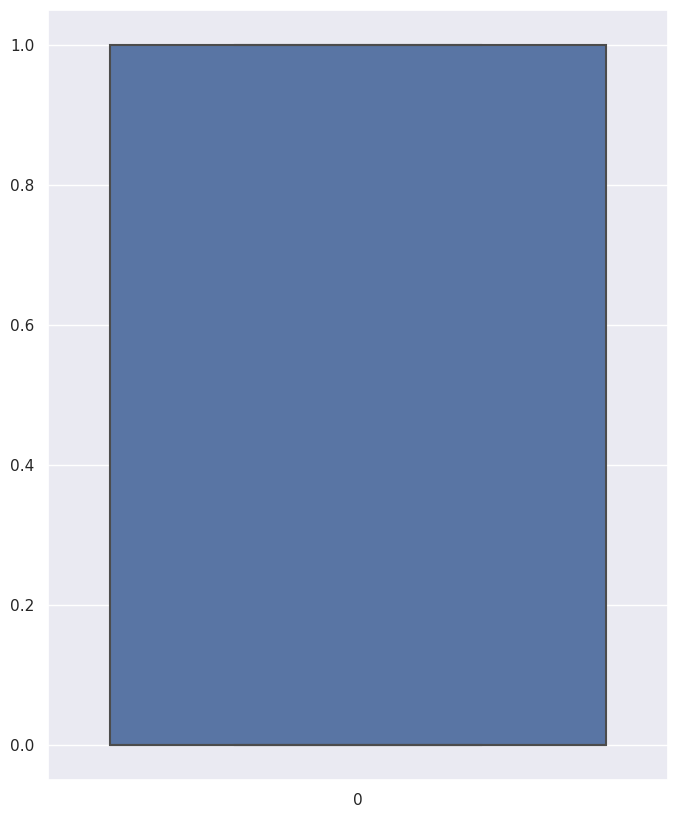

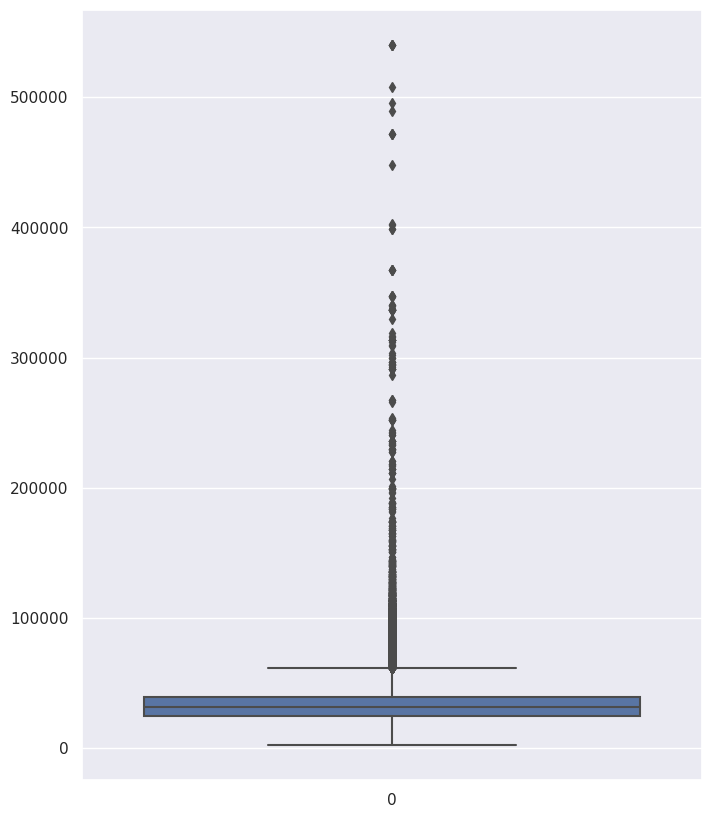

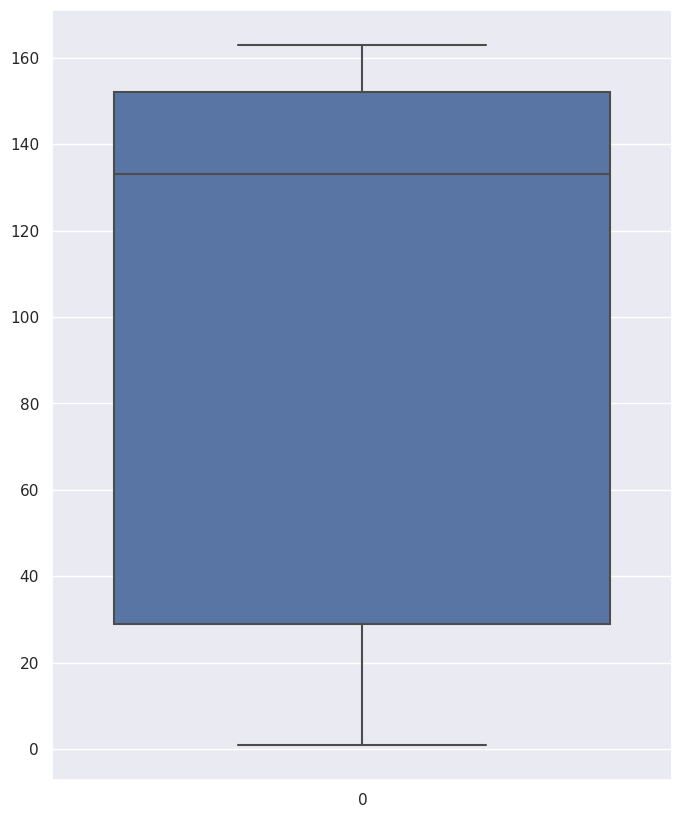

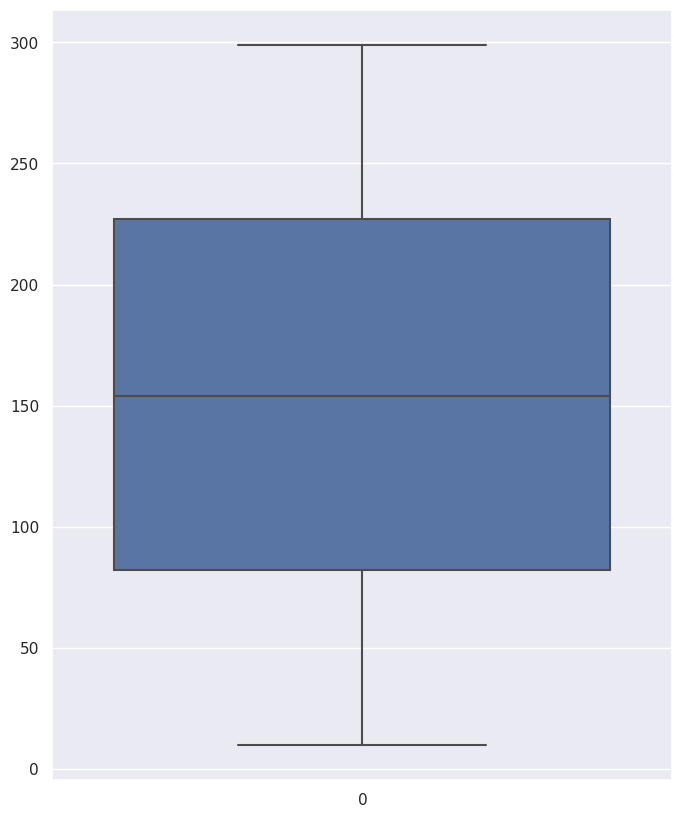

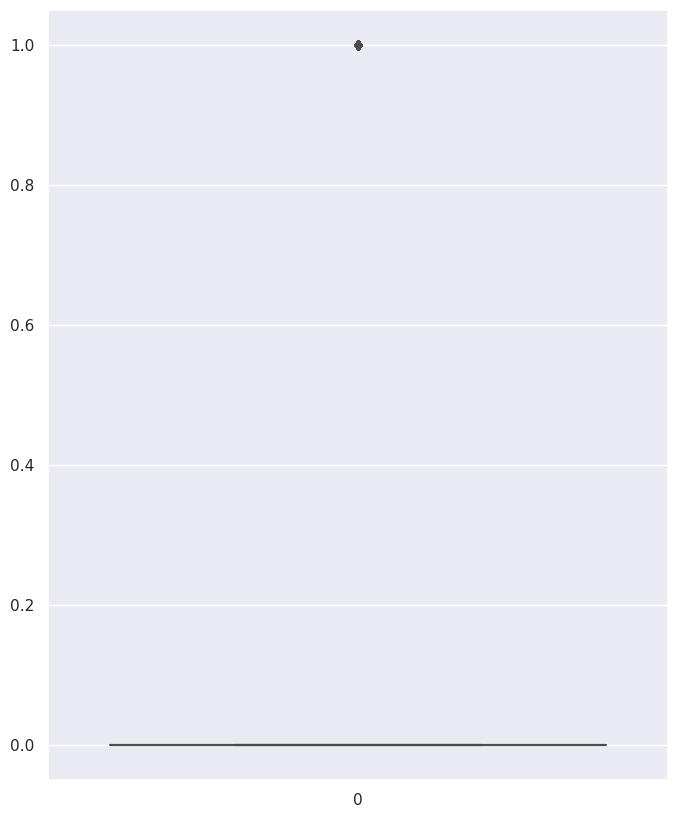

In [37]:


# Handling Outliers & Outlier treatments
# Checking Outliers with boxplot
for column_name in numerical_cols:
  plt.figure(figsize=(8,10))
  sns.boxplot(df_1[column_name])
  plt.show()
     


In [38]:

#Function for checking outliers
def check_outlier(start,end,step,column_name):
  for i in range(start,end,step):
    n = column_name.values
    n = np.sort(n)
    print('{} percentile value is {}'.format(i,int(column_name.quantile(i/100))))
  print('{} percentile value is {}'.format(end,int(column_name.quantile(end/100))))

In [39]:

# Removing outliers of column Annual_Premium
df_1 = df_1.drop(df_1[df['Annual_Premium'] < 19050].index)
df_1 = df_1.drop(df_1[df['Annual_Premium'] > 58680].index)
     

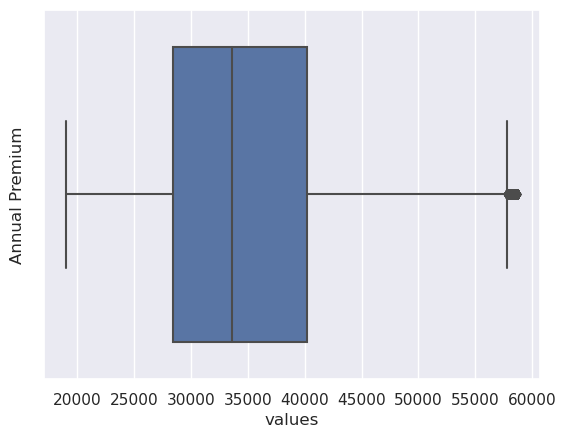

In [40]:
# Plotting the boxplot again to check if the capping is correct
sns.boxplot(x=df_1['Annual_Premium'])
plt.xlabel('values')
plt.ylabel('Annual Premium')
plt.show()

In [41]:

df_1.head()
     

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.-
**I used 2 outlier treatment techniques to check outliers boxplot and quantile because in these techniques i can easily find the outliers after which value it started.**


### 3. Categorical Encoding

In [42]:
# Encode your categorical columns
le = LabelEncoder()
df_1['Vehicle_Damage'] = le.fit_transform(df_1['Vehicle_Damage'])


In [43]:

# Changing categorical value to numerical values
df_1 = pd.get_dummies(df_1, columns = ['Gender','Vehicle_Age'])

In [44]:
df_1.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28,0,1,40454,26,217,1,0,1,0,0,1
1,2,76,1,3,0,0,33536,26,183,0,0,1,1,0,0
2,3,47,1,28,0,1,38294,26,27,1,0,1,0,0,1
3,4,21,1,11,1,0,28619,152,203,0,0,1,0,1,0
4,5,29,1,41,1,0,27496,152,39,0,1,0,0,1,0


#### What all categorical encoding techniques have you used & why did you use techniques?

Answer Here.-
**I have used Label Encoding technique for Vehicle_Damage column and One Hot Encoding for Gender, Vehicle_Age Column.**

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [45]:
#Dividing into dependent and independent Variable

# Manipulate Features to minimize feature correlation and create new features
#Contain all independent variables
x = df_1.drop(['Response'], axis=1)

#Contain Dependent variable
y = df_1['Response'] 

#### 2. Feature Selection

In [46]:
#Implementation Variance Threshold
variance_threshold = VarianceThreshold(threshold=0)
variance_threshold.fit(df_1)
variance_threshold.get_support()
     

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [47]:

#Implementation ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)

# Training the model
extra_tree_forest.fit(x, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
     

In [48]:
feature_importance_normalized = np.std( [ tree.feature_importances_ for tree in extra_tree_forest.estimators_ ] , axis = 0)

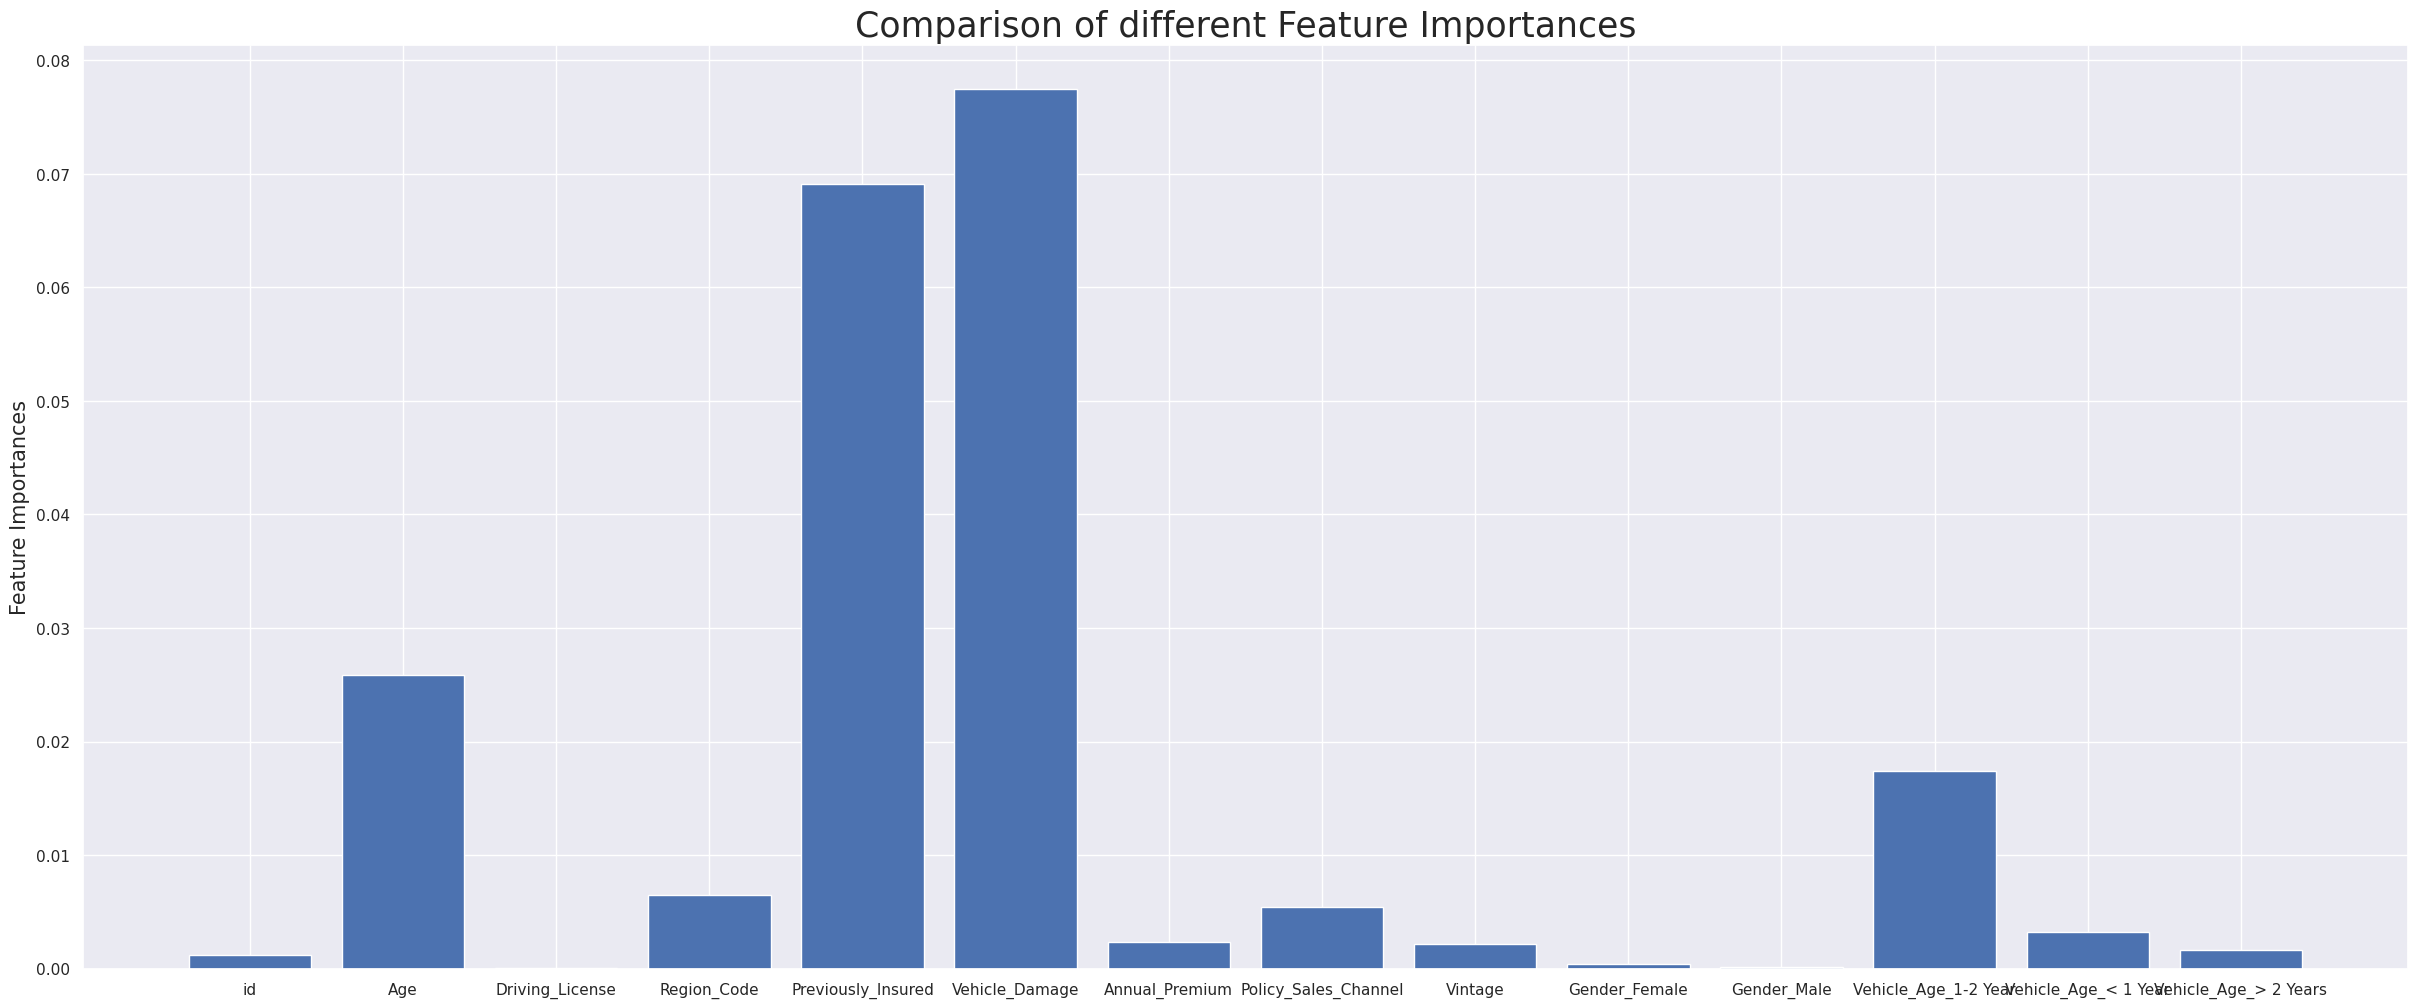

In [49]:
# Plotting a Bar Graph to compare the models
plt.figure(figsize = (30,12))
plt.bar(x.columns, feature_importance_normalized)

plt.ylabel('Feature Importances' , fontsize = 15)
plt.title('Comparison of different Feature Importances' , fontsize = 25)
plt.show()
     

In [50]:


# Dropping less important features
df_1.drop(columns=['Driving_License','Gender_Female','Gender_Male','id'],inplace=True)

     

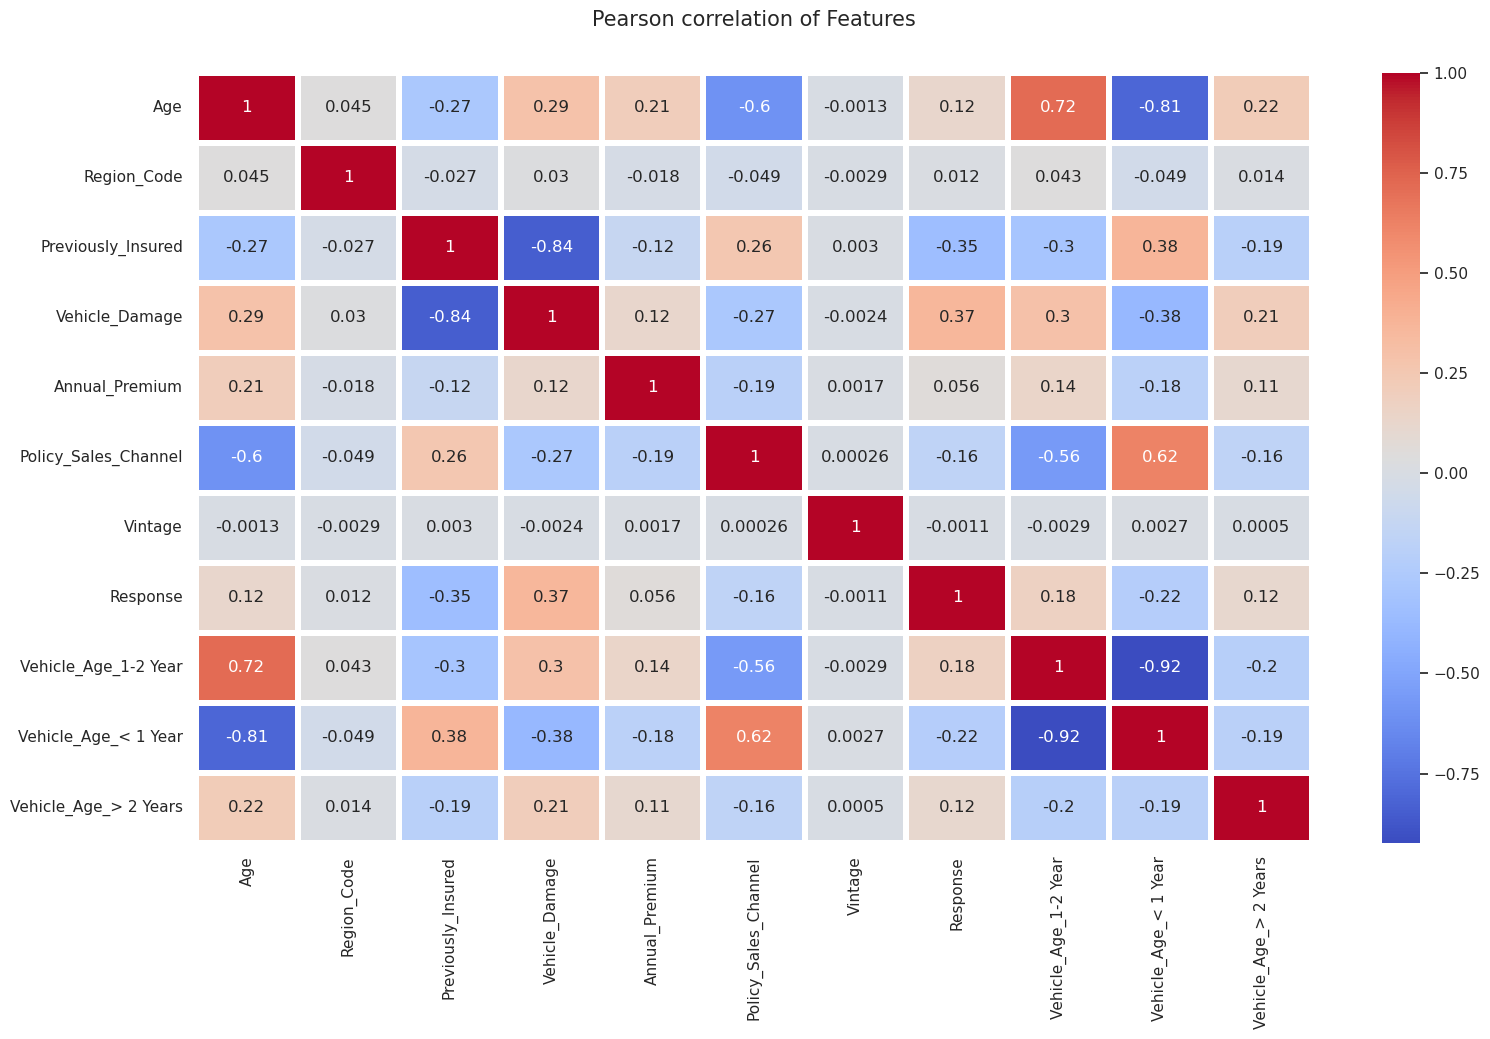

In [51]:
# Select your features wisely to avoid overfitting
#Checking correlation of all the columns using heatmap
plt.figure(figsize = (18,10))
correlation = df_1.corr()
sns.heatmap(correlation, annot= True,linewidths=3,cmap='coolwarm')
plt.title("Pearson correlation of Features", y=1.05, size=15)
plt.show()

##### What all feature selection methods have you used  and why?

Answer Here.

-**"Extra tree classifier is used to know the feature importance and used the correlation map to know highly correlated values".** 

##### Which all features you found important and why?

Answer Here.-**Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel','Vehicle_Age_1-2 Year','Vehicle_Age_< 1 Year','Vehicle_Age_> 2 Year'**

**I found these features are important.**

### 6. Data Splitting

In [52]:
#Contain all independent variables
X = df_1.drop(['Response'], axis=1)

#Contain Dependent variable
Y = df_1['Response'] 



In [53]:

# Split your data to train and test. Choose Splitting ratio wisely.
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [54]:
print('Train Data Shape')
print(X_train.shape)
print(y_train.shape)
print('\n')
print('Test Data Shape')
print(X_test.shape)
print(y_test.shape)

Train Data Shape
(209113, 10)
(209113,)


Test Data Shape
(89621, 10)
(89621,)


### 8. Data Scaling

In [55]:

# Scaling your data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##### Which method do you have used and why?


Answer Here.

**We used Standardization (StandardScaler) method for Data Scaling.**

**Standardization Here all the features will be transformed in such a way that it will have the properties of a standard normal distribution with mean (μ) = 0 and standard deviation(σ) = 1.**

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

0    262891
1     35843
Name: Response, dtype: int64
 


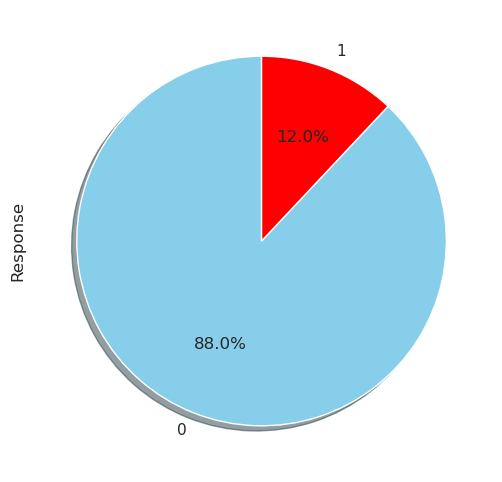

In [56]:
# Handling Imbalanced Dataset (If needed)
print(df_1.Response.value_counts())
print(" ")
# Dependant Variable Column Visualization
df_1['Response'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )
plt.show()
     

In [57]:

# using Smote Oversampling
sm = SMOTE(random_state=5)
X_train, y_train = sm.fit_resample(X_train, y_train)
     

In [58]:

# Checking Shape after resampling
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)
     

Number transactions X_train dataset:  (367806, 10)
Number transactions y_train dataset:  (367806,)
Number transactions X_test dataset:  (89621, 10)
Number transactions y_test dataset:  (89621,)


**Our data is highly imbalanced,we have used the SMOTE technique to solve this problem.**

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

**Synthetic Minority Oversampling Technique or SMOTE is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.**


**Now our data is ready for model implementation**. 

## ***7. ML Model Algorithms***

#### **Let's try various machine learning models on our data set to see how they each perform.**

**Logistic Regression**

**Decision Tree**

**Random Forest**


**Gradient Boost**

**XGBoost**

**LightGBM**

**Some terms that are important to know-**

**Precision**: Precision is the ratio of true positive predictions to the total number of positive predictions.

**Recall**:Recall is the ratio of true positive predictions to the total number of actual positive cases.

**F1-Score**: F1-Score is the harmonic mean of precision and recall.

**Support**: The support is the number of samples of the true response that lie in that class.

**Confusion Matrix**: The confusion matrix shows the number of true positive, false positive, true negative, and false negative predictions made by the model.

**ROC Curve**:A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. The false-positive rate is also known as probability of false alarm and can be calculated as (1 − specificity).

**Classification Report**: The classification report visualizer displays the precision, recall, F1, and support scores for the model. In order to support easier interpretation and problem detection, the report integrates numerical scores with a color-coded heatmap. All heatmaps are in the range (0.0, 1.0) to facilitate easy comparison of classification models across different classification reports.

### Function to calculate metrics

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:

results = {}
after_tuning_results = {}
     


In [60]:
def get_stat(model, X_train, X_test, y_train, y_test, output_name):
    
    
    
    
    
    '''this function implements the given model calculates the stastics and add the results to dictionary
  '''
  # fit the model
  

    model.fit(X_train,y_train)

  # predicting the test model
  
    y_pred = model.predict(X_test)

  # predict probability
 
    y_pred_probability = model.predict_proba(X_test)[:,1]
    
    print('--'*30)
    print(f'scores for {output_name}')
    print('--'*30)
    
  
  # calculating the recall score on y test and y predict
    recall_score_rs= recall_score(y_test, y_pred)
    print("Recall_Score : ", recall_score_rs)
  
  # calculating the Precision Score
    precision_score_ps= precision_score(y_test, y_pred)
    print("Precision Score :",precision_score_ps)

  # calculating the f1 Score
    f1_score_fs= f1_score(y_test, y_pred)
    print("f1_Score :", f1_score_fs)

  # calculating the accuracy Score
    accuracy_score_as= accuracy_score(y_test , y_pred)
    print("Accuracy_Score :",accuracy_score_as)

  # Calculating the ROC auc Score
    roc_auc_score_ras = roc_auc_score(y_test , y_pred)
    print("ROC_AUC Score:",roc_auc_score_ras)

  # storing the results
    results[output_name] = recall_score_rs, precision_score_ps, f1_score_fs, accuracy_score_as, roc_auc_score_ras

  # getting confusion matrix
    confusion_matrix_logic = metrics.confusion_matrix(y_test, y_pred)
    print('--'*30)
    print(f'confusion matrix for the implemented {output_name}')
    print('--'*30)
    print(confusion_matrix_logic)
    print('\n')

  # Plotting the confusion matrix
    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_logic, figsize=(6, 6), cmap=plt.cm.Blues)
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title(f'Confusion Matrix for {output_name}', fontsize=18)
    plt.show()

    print('--'*30)
    print(f'{output_name} ROC curve')
    print('--'*30)

  # Plotting ROC (Receiver Operating Characteristic) curve
    plt.rcParams['figure.figsize'] = (6,6)
    fpr, tpr, _ = roc_curve(y_test, y_pred_probability)
    plt.title(f'{output_name} ROC curve')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.plot(fpr,tpr)
    plt.plot((0,1), linestyle="--",color='black')
    plt.show()

## Logistic Regression

------------------------------------------------------------
scores for Logistic Regression
------------------------------------------------------------
Recall_Score :  0.9758299633217342
Precision Score : 0.2493871076287074
f1_Score : 0.39725109592450086
Accuracy_Score : 0.6486649334419389
ROC_AUC Score: 0.7902267252168503
------------------------------------------------------------
confusion matrix for the implemented Logistic Regression
------------------------------------------------------------
[[47758 31230]
 [  257 10376]]




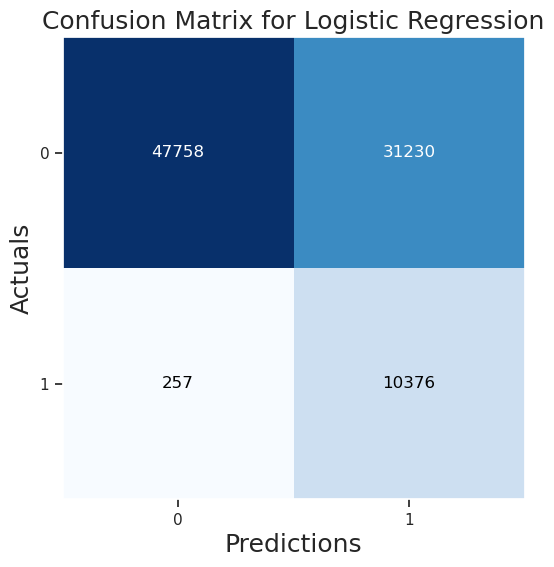

------------------------------------------------------------
Logistic Regression ROC curve
------------------------------------------------------------


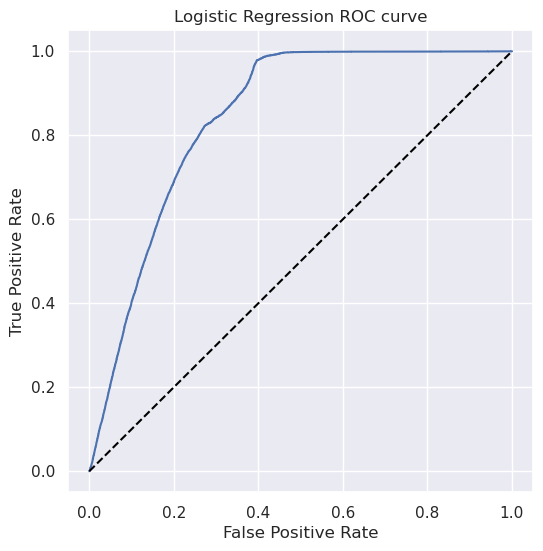

In [61]:

# ML Model - 1 Implementation
# initiating the logistic regression
LoReg = LogisticRegression()

# Fit the Algorithm and Predict on the model
get_stat(LoReg, X_train, X_test, y_train, y_test, 'Logistic Regression')

### Hyperparameter training

------------------------------------------------------------
scores for Logistic Regression after tuning
------------------------------------------------------------
Recall_Score :  0.9761121038277062
Precision Score : 0.24940526252553166
f1_Score : 0.39729750421068744
Accuracy_Score : 0.6486314591446202
ROC_AUC Score: 0.7903298150171092
------------------------------------------------------------
confusion matrix for the implemented Logistic Regression after tuning
------------------------------------------------------------
[[47752 31236]
 [  254 10379]]




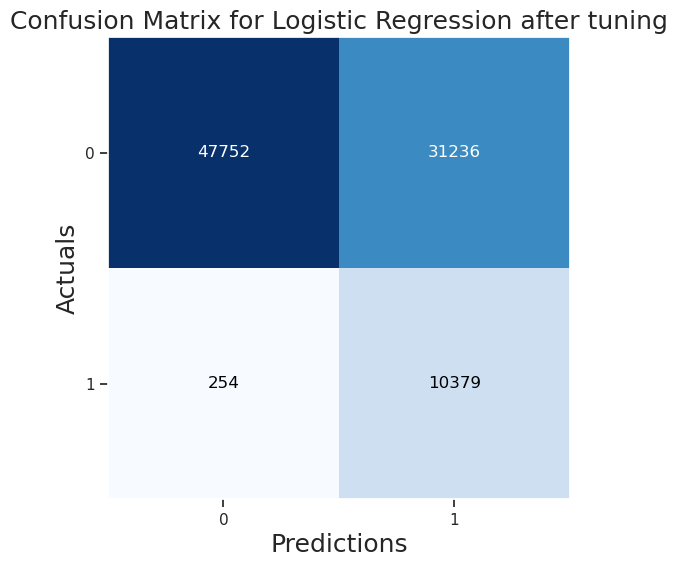

------------------------------------------------------------
Logistic Regression after tuning ROC curve
------------------------------------------------------------


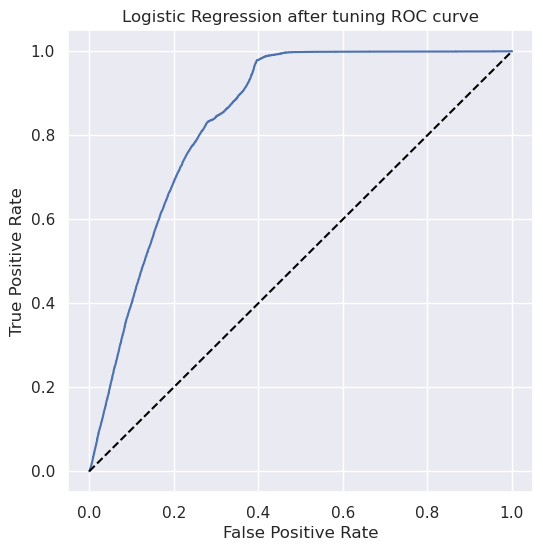

------------------------------------------------------------
Best cross-validation score: 0.7944160839486202
Best parameters: {'C': 0.001}


In [62]:

# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#setting grid parameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Fit the Algorithm and Predict on the model
grid_LoReg = GridSearchCV(LoReg, param_grid, cv=5)


# getting scores after gridsearchCV
get_stat(grid_LoReg, X_train, X_test, y_train, y_test, 'Logistic Regression after tuning')
print('--'*30)
print("Best cross-validation score:", grid_LoReg.best_score_)
print("Best parameters:", grid_LoReg.best_params_)
     

##### Which hyperparameter optimization technique have you used and why?

Answer Here.-
**I have used GridSearchCV for hypertuning.GridSearchCV performs an exhaustive search over a specified hyperparameter space, creating a grid of all possible hyperparameter combinations, and evaluating the performance of each combination using cross-validation. It then selects the combination of hyperparameters that results in the best performance on the validation set.**

**Using GridSearchCV can save time and effort in the process of selecting hyperparameters because it automates the process of evaluating different combinations of hyperparameters, eliminating the need for manual tuning. Additionally, it reduces the risk of overfitting, as it performs cross-validation on each combination of hyperparameters, ensuring that the selected hyperparameters generalize well to new data.**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

-**I cannot see much improvement after tuning.**

### Random Forest

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

------------------------------------------------------------
scores for Random Forest
------------------------------------------------------------
Recall_Score :  0.33819241982507287
Precision Score : 0.33535391215145016
f1_Score : 0.33676718486607976
Accuracy_Score : 0.8419566842592696
ROC_AUC Score: 0.623981762148319
------------------------------------------------------------
confusion matrix for the implemented Random Forest
------------------------------------------------------------
[[71861  7127]
 [ 7037  3596]]




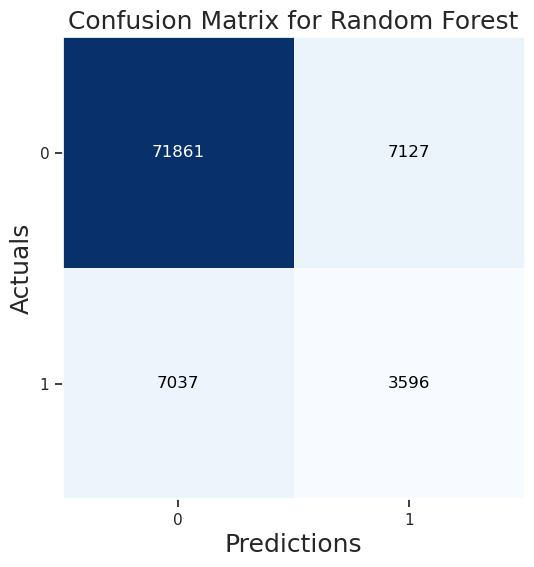

------------------------------------------------------------
Random Forest ROC curve
------------------------------------------------------------


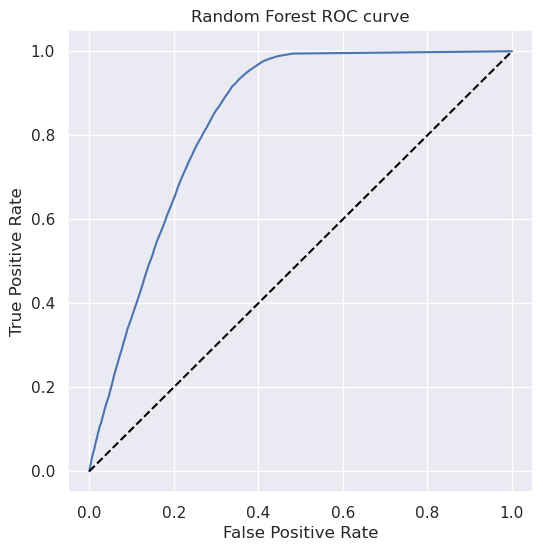

In [63]:
# Visualizing evaluation Metric Score chart
# initializing rfc

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
# geting stastics
get_stat(rfc, X_train, X_test, y_train, y_test, 'Random Forest')

## Hyperparameter tuning

------------------------------------------------------------
scores for random forest after tuning
------------------------------------------------------------
Recall_Score :  0.9036960406282328
Precision Score : 0.28421426247448905
f1_Score : 0.43242878358309705
Accuracy_Score : 0.7185481081442965
ROC_AUC Score: 0.7986601943152305
------------------------------------------------------------
confusion matrix for the implemented random forest after tuning
------------------------------------------------------------
[[54788 24200]
 [ 1024  9609]]




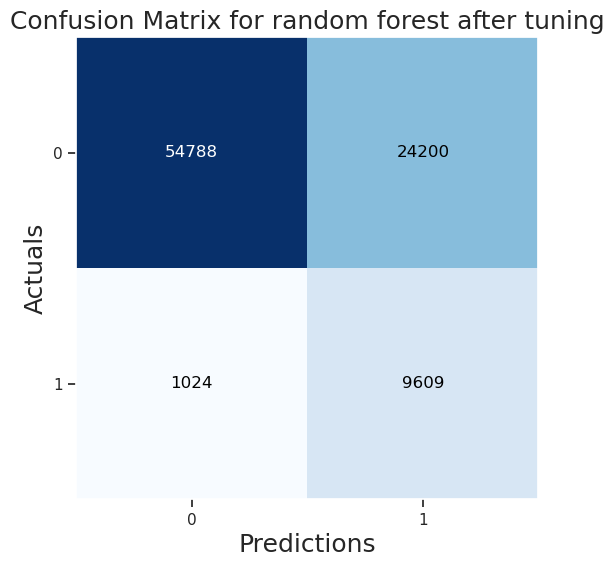

------------------------------------------------------------
random forest after tuning ROC curve
------------------------------------------------------------


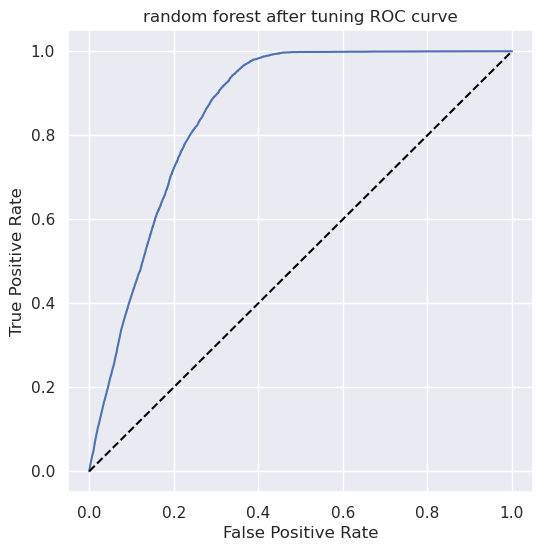

In [64]:

# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rfc_tuned = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Fit the Algorithm and Predict on the model
get_stat(rfc_tuned, X_train, X_test, y_train, y_test, 'random forest after tuning')

#### Which hyperparameter technique has been used and why?

Answer Here.-
**The following hyperparameters tuning has been done in the RandomForestClassifier:**

bootstrap=True: Whether bootstrap samples are used when building trees.

ccp_alpha=0.0: Complexity parameter used for Minimal Cost-Complexity Pruning.

criterion='gini': The function to measure the quality of a split.

max_depth=30: The maximum depth of the tree.

max_features='log2': The number of features to consider when looking for the best split.

max_leaf_nodes=40: The maximum number of leaf nodes in the tree.

max_samples=None: The number of samples to draw from X to train each base estimator.

min_impurity_decrease=0.0: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

min_samples_leaf=1: The minimum number of samples required to be at a leaf node.

min_samples_split=4: The minimum number of samples required to split an internal node.

min_weight_fraction_leaf=0.0: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. n_estimators=200: The number of trees in the forest.

n_jobs=None: The number of jobs to run in parallel for both fit and predict. None means 1 unless in a joblib.parallel_backend context.

oob_score=False: Whether to use out-of-bag samples to estimate the generalization accuracy.

random_state=None: Control the randomness of the estimator.

verbose=0: Controls the verbosity when fitting and predicting.

warm_start=False: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**there is slight improvement from logistic regression.**

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Recall_Score :  0.9159221292203518

Precision Score : 0.27998505059797607

f1_Score : 0.4288702468238765

Accuracy_Score : 0.7105700672833376

ROC_AUC Score: 0.799424324852238

### Decision Tree classifier

------------------------------------------------------------
scores for Decision Tree
------------------------------------------------------------
Recall_Score :  0.32615442490360197
Precision Score : 0.29130617387652247
f1_Score : 0.30774691631910545
Accuracy_Score : 0.8259113377445019
ROC_AUC Score: 0.6096703658421894
------------------------------------------------------------
confusion matrix for the implemented Decision Tree
------------------------------------------------------------
[[70551  8437]
 [ 7165  3468]]




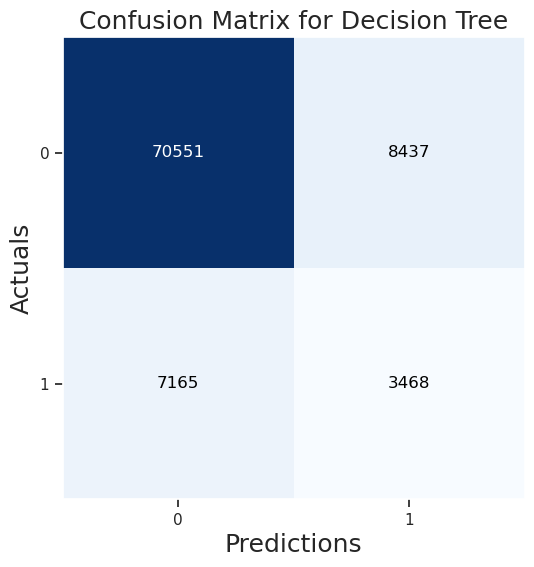

------------------------------------------------------------
Decision Tree ROC curve
------------------------------------------------------------


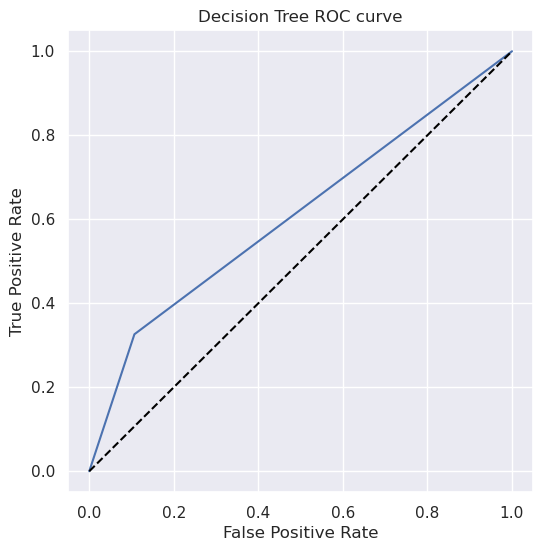

In [65]:


# ML Model - 3 Implementation (DecisionTreeClassifier)
Dt = DecisionTreeClassifier()

# Fit the Algorithm
DecisionTree = Dt.fit(X_train,y_train)

# Predict on the model

get_stat(DecisionTree, X_train, X_test, y_train, y_test, 'Decision Tree')

### XGB Classifier

------------------------------------------------------------
scores for XGB Classifier
------------------------------------------------------------
Recall_Score :  0.43327377033762815
Precision Score : 0.35835407591785934
f1_Score : 0.3922687215292264
Accuracy_Score : 0.8407181352584774
ROC_AUC Score: 0.6644200927446484
------------------------------------------------------------
confusion matrix for the implemented XGB Classifier
------------------------------------------------------------
[[70739  8249]
 [ 6026  4607]]




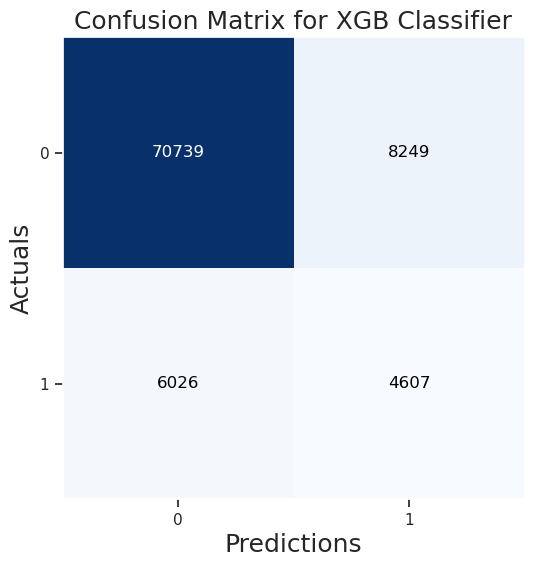

------------------------------------------------------------
XGB Classifier ROC curve
------------------------------------------------------------


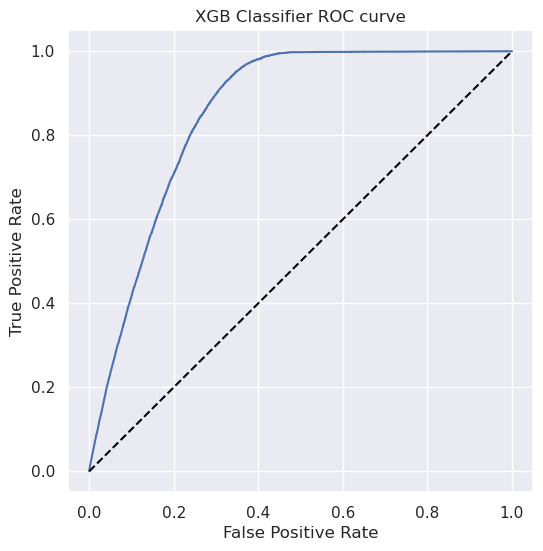

In [66]:
# ML Model - 3 Implementation
xgb = XGBClassifier()


# Fit the Algorithm and Predict
get_stat(xgb, X_train, X_test, y_train, y_test, 'XGB Classifier')

#### 2. Cross- Validation & Hyperparameter Tuning

------------------------------------------------------------
scores for XGB Classifier after tuning
------------------------------------------------------------
Recall_Score :  0.9277720304711746
Precision Score : 0.2751666620177959
f1_Score : 0.42444712159022463
Accuracy_Score : 0.7014762165117551
ROC_AUC Score: 0.7993926744749655
------------------------------------------------------------
confusion matrix for the implemented XGB Classifier after tuning
------------------------------------------------------------
[[53002 25986]
 [  768  9865]]




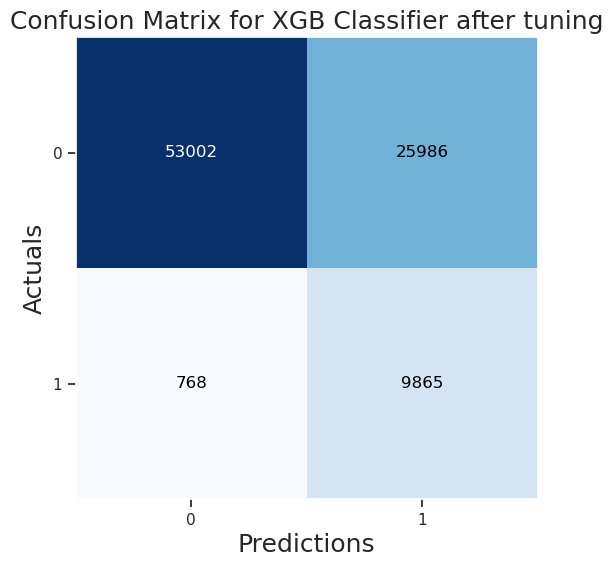

------------------------------------------------------------
XGB Classifier after tuning ROC curve
------------------------------------------------------------


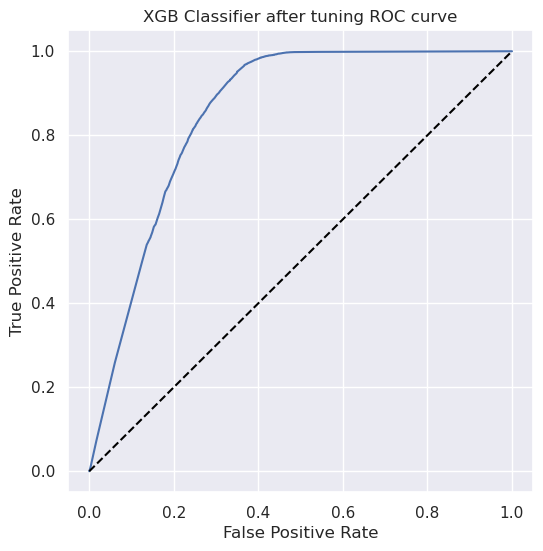

In [67]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params = {
    'max_depth': [3, 5],
    'learning_rate': [0.1],
    'n_estimators': [10, 20],
}

# Perform cross-validation and hyperparameter tuning
grid_search_cv_xgb = GridSearchCV(xgb, params, cv=5, scoring='accuracy')
# Fit the Algorithm and Predict on the model
get_stat(grid_search_cv_xgb, X_train, X_test, y_train, y_test, 'XGB Classifier after tuning')


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

**GridSearchCV performs an exhaustive search over a specified hyperparameter space, creating a grid of all possible hyperparameter combinations, and evaluating the performance of each combination using cross-validation. It then selects the combination of hyperparameters that results in the best performance on the validation set.**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.
-**Comparing to Random forest, XGB is performing better.**

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

-**Recall_Score would bw a better metrics as we do not want to miss on the customers who were intrested to by the policy and we miss them.**

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

-**XGB classifier after tuning is better with f1 score and the precession score is improved so it is better to go with thisAnswer Here.**

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [68]:

# Save the File
import pickle
pickle_path ='dir_path' + 'XGB Classifier after tuning.pkl'

# serialize process (wb=write byte)
pickle.dump(grid_search_cv_xgb, open(pickle_path,'wb'))
# Assuming you have trained and saved your machine learning model in the 'model' variable

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [69]:
# Load the File and predict unseen data.



# Load the saved model from the pickle file
Regression_model= pickle.load(open(pickle_path,'rb'))

# Predicting the unseen data(test set)
Regression_model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 1])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In [70]:
res=pd.DataFrame(results,index=["Recall Score", 'Precision Score', "f1 Score",'Accuracy Score','ROC_AUC Score'])
res.transpose()
     

,Recall Score,Precision Score,f1 Score,Accuracy Score,ROC_AUC Score
Logistic Regression,0.975830,0.249387,0.397251,0.648665,0.790227
Logistic Regression after tuning,0.976112,0.249405,0.397298,0.648631,0.790330
Random Forest,0.338192,0.335354,0.336767,0.841957,0.623982
random forest after tuning,0.903696,0.284214,0.432429,0.718548,0.798660
Decision Tree,0.326154,0.291306,0.307747,0.825911,0.609670
XGB Classifier,0.433274,0.358354,0.392269,0.840718,0.664420
XGB Classifier after tuning,0.927772,0.275167,0.424447,0.701476,0.799393


there are 206088 Male customers and 175019 Female customers

there are 380295 people who own Driving License and 812 don't

Its found that most of the people who own driving license owns a car

It is observed that people who have previously not insured are intrested in the policy

It is found that people who have not insured previously are more intrested in buying the ploicy, so it is better to tap the market who previously have not insured

It is observed that most of the people with vehicle age is 1-2 years.

ratio wise people with vehicle age greater than 2 years are more intrested in buying policy

most of the customers have their vehicle age as 1-2 years

as per the ratio it is better to tap the customers whose vehicle age is more than 2 years and we have a good scope in people who own vehicle of age 1-2 years as well.

Its found that previously customers who got their vehicle damaged are more intrested in buying new policy

customers who are previously not damaged their car are not much intrested in buying the policy

people who have damaged their car previously are more intrested in buying the policy.

It is found that people who have damaged their vehicle and not damaged share almost equal proportion.

comparing the insights previously it is found that the people who damaged their vehicle are more intrested to buy ploicy, so since 50% of the people who are willing to buy the plociy, the market is big to capture

Most of the premium falls under range 5000-100000

there are some premiums that are above 100000

There are no outliers in the age columns and most of the customers belong to age group 25-48

Customes of age between 32-58 ar more mature and are intrested in buying the policy

Tapping the customer of age between 32-58 would be more benificial

Most of the customers belong to region code 28 followed by 8

most of our customers belong to region code 28, so it would be better if we run our marketing campagn such that in 28 to aquire more customers and in other regions to penetrate the market.

Its found that most of the customer have vehicle age of around 1-2 year and there are less customers whose vehicle age is greater than 2 years

Its found that most of the customers who do not own driving license are less and are least intreasted, so tapping the customers with license would be benificial

It is found that policy sales channel and respons is negativly correlated.

most of the properties/features against eachother are very least correlated.

positive response of Vintage customers are positivly correlated with annual customers

policy sales channel is negativly corellated to age.

### ***Hurrah! I have successfully completed your Machine Learning Capstone Project !!!***